# Understanding the State of Mental Health in the U.S.

### Team 14 
### Members: Vidisha, Yijin, Yvette


#### Dataset: National Health Interview Survey (2020 NHIS): https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NHIS/2020/adult20csv.zip

### Questions:

**1. What individual characteristics are important in predicting anxiety disorder (ANXEV_A)?**


**2. Which individual characteristics are important in predicting the frequency of depression (DEPFREQ_A)?**

**3. Which individual characteristics are important in predicting whether an individual will seek mental health (MHTHRPY_A) services/treatment?**

---

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from dtreeviz.trees import dtreeviz
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

%matplotlib inline
plt.style.use('seaborn-white')

from yellowbrick.features.rankd import Rank1D, Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.manifold import Manifold
from yellowbrick.features import PCA

from imblearn.over_sampling import RandomOverSampler, SMOTE

# Data Cleaning

In [2]:
survey = pd.read_csv('adult20.csv') # Reading Data for 2020

survey

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,3,14,5,0,100000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,11,10,4526.109,H066706,6.47
1,3,11,4,0,75000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,8,10,12809.039,H034928,3.64
2,3,14,4,0,90000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,8,10,10322.534,H018289,6.76
3,3,11,3,0,65000,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,3,10,7743.375,H006876,3.79
4,3,8,1,0,25762,2,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,6,10,4144.724,H028842,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31563,4,13,4,0,79000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,2,10,2857.585,H065697,4.61
31564,4,11,3,0,60000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,2,10,2994.763,H061937,3.50
31565,4,8,1,0,27500,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,2,10,1328.907,H005331,2.24
31566,4,8,3,0,61880,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,2,10,3481.003,H047025,2.38


### Step 1: Dealing with missing values

Since we are using survey data, there are bound to be several missing values in various attributes due to non-response. In order to deal with such missing observations, we consider only those columns in the data set with number of missing values less than 10% of the total observations. 

We consider 10% as a reasonable threshold for a data set with 31,586 observations. For columns with number of missing vales less than 10% of the total observations, we drop the missing values as these are a small proportion of the total observations.

In [3]:
null = survey.isna().sum()/ len(survey) # Proportion of missing values in every attribute
keep = list(null[null < 0.1].index) # Attributes with less than 10% missing observations

survey_cl = survey[keep]

### Remaining Missing Values


In [4]:
percent = null[keep] #quantifying proportion of missing observations
df_miss = pd.DataFrame({'Column Name': keep,
                        'Percent Missing': round(percent * 100, 2)}) #displaying variable name and proportion of missing observations

df_miss.sort_values(by = ['Percent Missing'], ascending = False).reset_index(drop = True).head(20)

,Column Name,Percent Missing
0,WLK13M_A,9.37
1,WLK100_A,8.79
2,STEPS_A,8.79
3,USPLKIND_A,8.14
4,WRKHLTHFC_A,7.82
5,HINOTYR_A,7.23
6,INCSSRR_A,3.71
7,INCOTHR_A,3.71
8,INCRETIRE_A,3.71
9,INCWELF_A,3.71


In [5]:
df_org = survey_cl.dropna().reset_index(drop = True) #Dropping missing values in remaining variables
print("Number of Missing Values: %1.0f"%df_org.isnull().sum().sum())

Number of Missing Values: 0


In [6]:
df_org.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,3,14,5,0,100000,0,2,103,2,1,...,2,2,2,1,1,11,10,4526.109,H066706,6.47
1,3,11,3,0,65000,0,2,103,1,1,...,2,2,1,1,1,3,10,7743.375,H006876,3.79
2,3,9,2,0,36000,0,2,103,2,1,...,1,1,4,1,1,6,10,3164.668,H004811,2.93
3,3,3,1,0,30105,2,2,103,2,1,...,2,2,2,8,1,6,10,8423.396,H068043,0.98
4,2,2,1,0,9000,1,2,115,3,2,...,2,2,4,1,1,12,10,3231.773,H028696,0.73


### Step 2: Removing irrelevant columns

Our original dataset included over 200 variables. In this step, we manually selected variables using the dataset codebook (https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2020/adult-codebook.pdf) and created a csv file (relevant_variables.csv) with all the variables relevant for our study topic. We decided to take this approach given the large number of variables that were similar. For example, there were several variables related to food insecurity (e.g., Couldn't afford to eat balanced meals; food didn't last; worry food would run out;receive food stamps, past 12m). For each group of similar variables, we chose the one captured the most information.

Among the chosen variables, we classify them into 1) target variables, 2) categorical variables, 3) continuous variables.

In [7]:
rv = pd.read_excel('relevant_variables.xlsx') 
df_r = df_org[list(rv["Variable Names"])]

print(df_r.describe())
df_r.head(10)

             AGEP_A       ANXEV_A     ANXFREQ_A      ANXMED_A      ARTHEV_A  \
count  21890.000000  21890.000000  21890.000000  21890.000000  21890.000000   
mean      54.106898      1.859479      3.616583      1.879488      1.755505   
std       17.604185      0.408785      1.368223      0.395050      0.485406   
min       18.000000      1.000000      1.000000      1.000000      1.000000   
25%       40.000000      2.000000      3.000000      2.000000      1.000000   
50%       56.000000      2.000000      4.000000      2.000000      2.000000   
75%       68.000000      2.000000      5.000000      2.000000      2.000000   
max       99.000000      9.000000      9.000000      9.000000      9.000000   

           BMICAT_A       CHDEV_A       CHLEV_A   COGMEMDFF_A      COPDEV_A  \
count  21890.000000  21890.000000  21890.000000  21890.000000  21890.000000   
mean       3.080219      1.958657      1.691000      1.181270      1.957972   
std        1.172404      0.357119      0.571848    

,AGEP_A,ANXEV_A,ANXFREQ_A,ANXMED_A,ARTHEV_A,BMICAT_A,CHDEV_A,CHLEV_A,COGMEMDFF_A,COPDEV_A,...,SEX_A,SLPFLL_A,SLPHOURS_A,SLPREST_A,SLPSTY_A,SMKCIGST_A,SOCSCLPAR_A,STRFREQW_A,URBRRL,VIGFREQW_A
0,85,2,5,2,2,2,2,2,2,2,...,1,2,9,4,1,4,1,94,3,94
1,32,2,3,2,2,2,2,2,1,2,...,1,1,8,3,2,4,1,3,3,5
2,70,2,4,2,1,3,2,1,1,2,...,2,2,7,2,2,4,1,2,3,94
3,32,2,1,2,2,4,2,2,1,2,...,2,1,8,1,1,4,1,94,3,94
4,77,2,5,2,2,9,2,2,1,2,...,2,2,8,2,2,4,1,94,2,94
5,71,2,5,2,2,3,2,2,1,2,...,1,1,8,4,1,4,1,94,2,94
6,60,2,1,2,1,3,2,2,1,2,...,2,4,7,2,2,4,1,94,2,94
7,62,2,5,2,1,4,2,2,1,2,...,1,1,6,4,1,4,1,94,2,94
8,58,2,4,2,2,3,2,2,1,2,...,2,2,6,3,2,4,1,94,4,2
9,56,1,3,1,1,4,2,2,1,2,...,1,1,6,3,1,3,1,94,4,0


### Step 3: Transforming Variables with Categorical Features

In [8]:
feature_name = df_r.columns.tolist()
target = ['ANXEV_A', 'ANXFREQ_A', 'ANXMED_A', 'DEPEV_A', 'DEPFREQ_A', 'DEPMED_A', 'SOCSCLPAR_A', 'MHTHRPY_A']
unique = []
type = []
for n in feature_name:
    size = len(df_r[n].unique())
    if n in target:
        type.append('Target')
    elif size > 15:
        type.append('Continuous')
    else:
        type.append('Ordinal')
    unique.append(size)
    
rv['Unique'] = unique
rv['Type*'] = type

rv
# *Type: variables typed by 'ordinal' also include binary and target variables
#        We will specify that in a bit

,Variable Names,Description,Unique,Type*
0,AGEP_A,Age of SA,70,Continuous
1,ANXEV_A,Any type of anxiety disorder?,4,Target
2,ANXFREQ_A,"How often feel worried, nervous, or anxious",7,Target
3,ANXMED_A,Take medication for worried/nervous/anxious fe...,4,Target
4,ARTHEV_A,Ever had arthritis,4,Ordinal
5,BMICAT_A,"Categorical body mass index, public use",5,Ordinal
6,CHDEV_A,Ever been told you had coronary heart disease,4,Ordinal
7,CHLEV_A,Ever told you had high cholesterol,4,Ordinal
8,COGMEMDFF_A,Do you have difficulty remembering or concentr...,6,Ordinal
9,COPDEV_A,"Ever been told you had COPD, emphysema, or chr...",4,Ordinal


In [9]:
#check the data type of ordinal variables
rv_target_ord = rv[rv['Type*'] != 'Continuous']
rv_ord = rv[rv['Type*'] == 'Ordinal']

df_cat = df_r[rv_ord['Variable Names'].tolist()]
print("Data Type of the categorical variables (Before cleaning)\n")
print('=' * 22)
print(df_cat.dtypes)
print('=' * 22)

# Note that INCWELF_A has floating values, which shouldn't exist
# Reset the data type as integer
df_cate = df_r.astype({'INCWELF_A':'int64'})
print("\nData Type of all variables (After cleaning)\n")
print('=' * 22)
print(df_cate.dtypes)
print('=' * 22)

Data Type of the categorical variables (Before cleaning)

ARTHEV_A          int64
BMICAT_A          int64
CHDEV_A           int64
CHLEV_A           int64
COGMEMDFF_A       int64
COPDEV_A          int64
DEMENEV_A         int64
DIBEV_A           int64
DRKSTAT_A         int64
EDUC_A            int64
EMERG12MTC_A      int64
FGEFRQTRD_A       int64
FUNWLK_A          int64
HYPEV_A           int64
INCGRP_A          int64
INCWELF_A       float64
MARSTAT_A         int64
NOTCOV_A          int64
ORIENT_A          int64
PEOPLEWLK_A       int64
RACEALLP_A        int64
REGION            int64
SCHCURENR_A       int64
SEX_A             int64
SLPFLL_A          int64
SLPREST_A         int64
SLPSTY_A          int64
SMKCIGST_A        int64
URBRRL            int64
dtype: object

Data Type of all variables (After cleaning)

AGEP_A          int64
ANXEV_A         int64
ANXFREQ_A       int64
ANXMED_A        int64
ARTHEV_A        int64
BMICAT_A        int64
CHDEV_A         int64
CHLEV_A         int64
COGMEMDFF_

In [10]:
# Describe all ordinal variables
for col in list(df_cat):
    print(df_cat[col].value_counts())
    print('\n')

2    16360
1     5505
9       14
7       11
Name: ARTHEV_A, dtype: int64


3    7707
2    6871
4    6593
9     434
1     285
Name: BMICAT_A, dtype: int64


2    20693
1     1158
9       29
7       10
Name: CHDEV_A, dtype: int64


2    14754
1     7087
9       39
7       10
Name: CHLEV_A, dtype: int64


1    18312
2     3237
3      329
9        5
7        4
4        3
Name: COGMEMDFF_A, dtype: int64


2    20808
1     1059
9       12
7       11
Name: COPDEV_A, dtype: int64


2    21748
1      130
7       10
9        2
Name: DEMENEV_A, dtype: int64


2    19766
1     2106
7       11
9        7
Name: DIBEV_A, dtype: int64


6     6973
7     4149
5     2884
2     2215
1     2153
3     1708
8     1469
9      236
10      97
4        6
Name: DRKSTAT_A, dtype: int64


8     5532
4     4547
5     3471
9     2885
7     2007
1     1056
6      837
11     499
3      389
10     327
2      273
99      32
0       26
97       9
Name: EDUC_A, dtype: int64


0    18245
1     2482
2      812
3      169
4 

In [11]:
# Non-reporting values in the ordinal/target variables:
# 7: Refused
# 8: Not Ascertained
# 9: Don't know

# Non-reporting values in the continuous variables
# 97: Refused
# 98: Not Ascertained
# 99: Don't know

# Not informative if included in the model
# Therefore, we convert these 6 classes into 1 with a value of 100

# First, make sure there is no '100' value that has statistical meaning
max = df_r[rv_target_ord['Variable Names'].tolist()].describe().loc['max'].max()
print('Among categorical variables, the maximum value with statistical meaning is:', max)

df_cate[rv_target_ord['Variable Names'].tolist()] = df_cate[rv_target_ord['Variable Names'].tolist()].replace([7, 8, 9], 100)

df_category = df_cate.replace([97, 98, 99], 100)

Among categorical variables, the maximum value with statistical meaning is: 99.0


In [12]:
feature_name = df_category.columns.tolist()
unique_ = []
type_ = []
for n in feature_name:
    size = len(df_category[n].unique())
    unique_.append(len(df_category[n].unique()))
    if n in target:
        type_.append('Target')
    elif size > 15:
        type_.append('Continuous')
    elif size > 3:
        type_.append('Ordinal')
    else:
        type_.append('Binary')
rv['Unique*'] = unique_
rv['Type**'] = type_

rv

,Variable Names,Description,Unique,Type*,Unique*,Type**
0,AGEP_A,Age of SA,70,Continuous,69,Continuous
1,ANXEV_A,Any type of anxiety disorder?,4,Target,3,Target
2,ANXFREQ_A,"How often feel worried, nervous, or anxious",7,Target,6,Target
3,ANXMED_A,Take medication for worried/nervous/anxious fe...,4,Target,3,Target
4,ARTHEV_A,Ever had arthritis,4,Ordinal,3,Binary
5,BMICAT_A,"Categorical body mass index, public use",5,Ordinal,5,Ordinal
6,CHDEV_A,Ever been told you had coronary heart disease,4,Ordinal,3,Binary
7,CHLEV_A,Ever told you had high cholesterol,4,Ordinal,3,Binary
8,COGMEMDFF_A,Do you have difficulty remembering or concentr...,6,Ordinal,5,Ordinal
9,COPDEV_A,"Ever been told you had COPD, emphysema, or chr...",4,Ordinal,3,Binary


In [13]:
rv_ = rv.drop(['Unique', 'Type*'], axis = 1)
rv_

,Variable Names,Description,Unique*,Type**
0,AGEP_A,Age of SA,69,Continuous
1,ANXEV_A,Any type of anxiety disorder?,3,Target
2,ANXFREQ_A,"How often feel worried, nervous, or anxious",6,Target
3,ANXMED_A,Take medication for worried/nervous/anxious fe...,3,Target
4,ARTHEV_A,Ever had arthritis,3,Binary
5,BMICAT_A,"Categorical body mass index, public use",5,Ordinal
6,CHDEV_A,Ever been told you had coronary heart disease,3,Binary
7,CHLEV_A,Ever told you had high cholesterol,3,Binary
8,COGMEMDFF_A,Do you have difficulty remembering or concentr...,5,Ordinal
9,COPDEV_A,"Ever been told you had COPD, emphysema, or chr...",3,Binary


In [14]:
# Transform into dummy variables
df = pd.get_dummies(df_category, columns = rv_['Variable Names'].loc[rv_['Type**'] == 'Binary'], drop_first = True)

### Step 5: Exploratory Data Analysis

**1) Boxplot: Distribution of age in terms of different levels of anxiety/depression**

Text(0, 0.5, '')

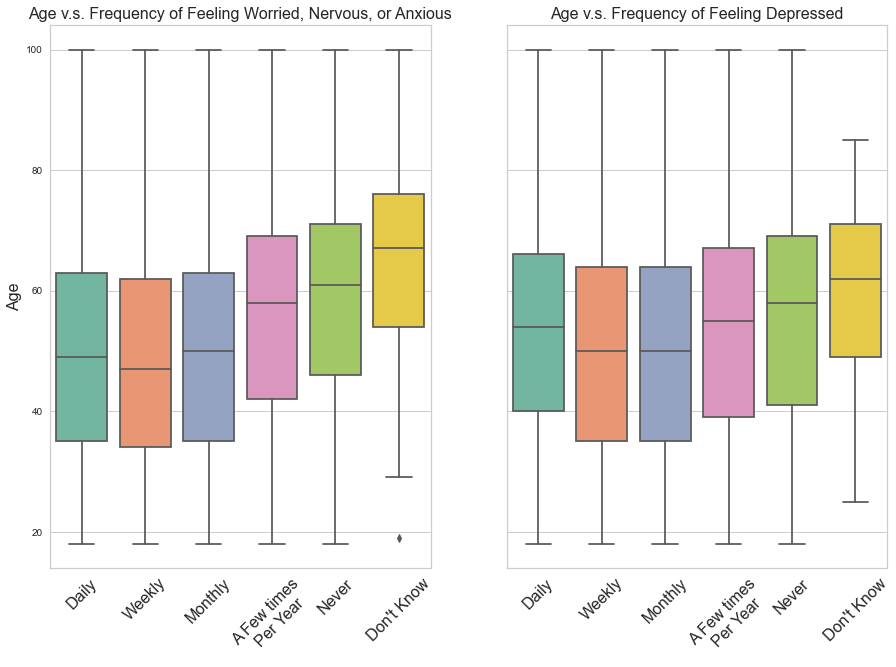

In [15]:
# Draw a boxplot to show the distribution of age against frequency of feeling anxious/depression
fig, axes = plt.subplots(1, 2, figsize = (15, 10), sharey = True)
xlabel = ('Daily', 'Weekly', 'Monthly',
          'A Few times\n Per Year', 'Never', 
          'Don\'t Know')

# Age vs Frequency of Feeling Worried, Nervous, or Anxious
sns.boxplot(x = 'ANXFREQ_A', y = 'AGEP_A', data = df_category, palette = "Set2", ax = axes[0])
axes[0].set_title('Age v.s. Frequency of Feeling Worried, Nervous, or Anxious', fontdict = {'size': 16})
axes[0].set_xticklabels(xlabel, fontdict = {'size': 16}, rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Age', fontdict = {'size': 16})

# Age vs Frequency of Feeling Depressed
sns.boxplot(x = 'DEPFREQ_A', y = 'AGEP_A', data = df_category, palette = "Set2", ax = axes[1])
axes[1].set_title('Age v.s. Frequency of Feeling Depressed', fontdict = {'size': 16})
axes[1].set_xticklabels(xlabel, fontdict = {'size': 16}, rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

**From the boxplot, we can conclude that:**

[1] People in their early 50s are more likely to suffer from higher anxiety and depression compared to other age groups.

[2] Younger people tend to have a higher frequency of feeling related to anxiety and depression.

---

**2) Countplot: Distribution of Depression by Sex**

- The sample adults has once been told by a doctor or other health professional that they had some type of depression

([<matplotlib.axis.XTick at 0x1e310981040>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

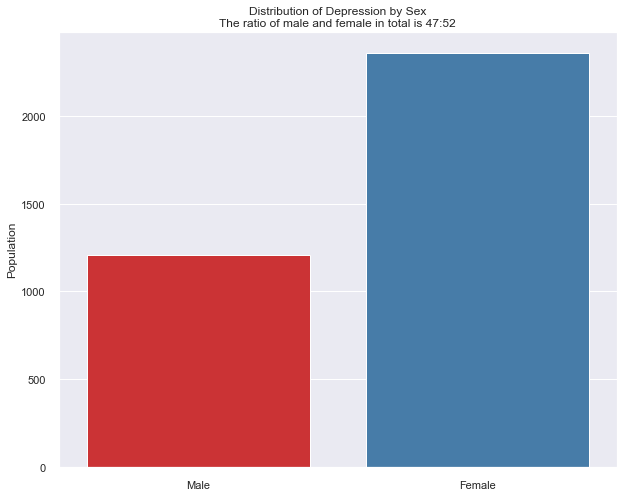

In [16]:
# Subset the sample adults who has once been diagnosed with depression
df_depression = df_category[df_category['DEPEV_A'] == 1]

# Check if the distribution of sex is balanced in the original dataset
male = len(df_category['SEX_A'][df_category['SEX_A'] == 1])
female = len(df_category['SEX_A'][df_category['SEX_A'] == 2])

# Draw the barplox
sns.set(rc = {'figure.figsize':(10,8)})
sns.countplot(x = df_depression['SEX_A'][df_depression['SEX_A'] != 100], palette = "Set1")
plt.title('Distribution of Depression by Sex\n'+'The ratio of male and female in total is '+
                  str(int(male/(male+female)*100))+':'+str(int(female/(male+female)*100)))
plt.xlabel('')
plt.ylabel('Population')
plt.xticks([0,1], ['Male','Female'])

**From the barplot, we can conclude that:**

[1] The distribution of sex in the original dataset is almost balanced (Male : Female = 47:52)

[2] Given [1], in the countplot, the size of the female group within the sample of adults who have once been diagnosed with depression is 2x that of male group.

[3] Therefore, females have a siginificant higher rate of getting depression.

---

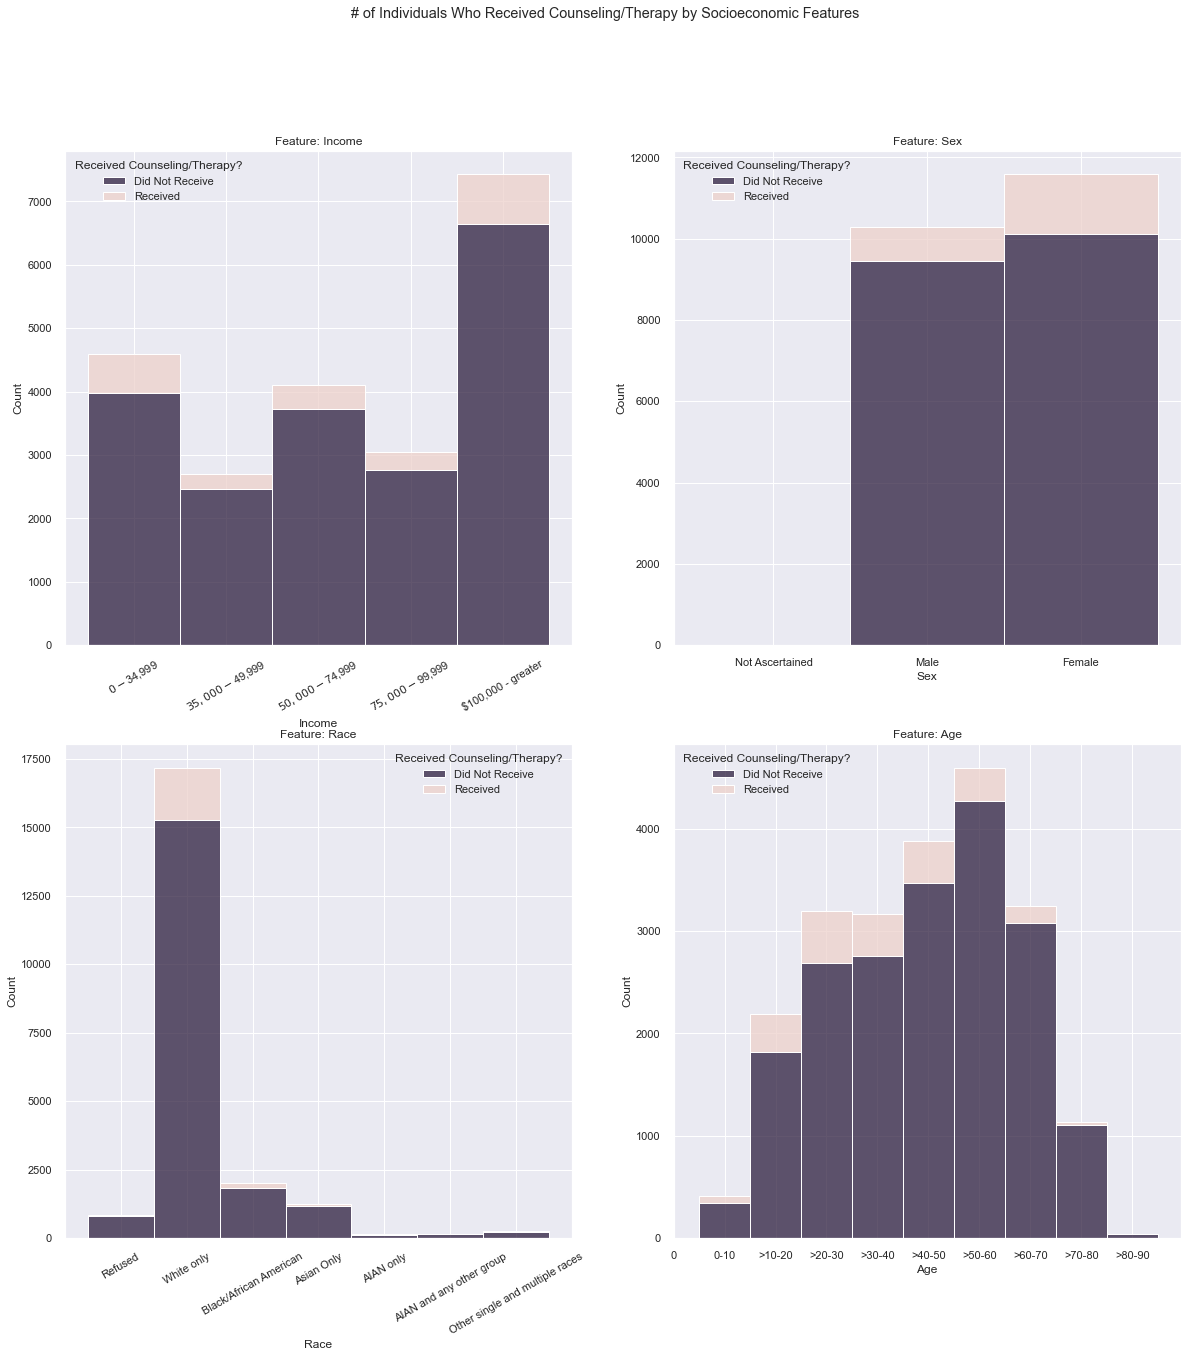

In [138]:
import matplotlib.ticker as mticker

df_cate = df_cate[df_cate['MHTHRPY_A']!=100]
df_graph = df_cate.copy()
df_graph[rv_ord['Variable Names'].tolist()] = df_graph[rv_ord['Variable Names'].tolist()].replace(100, 0)

fig, axes = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle('# of Individuals Who Received Counseling/Therapy by Socioeconomic Features')
ax1 = sns.histplot(ax=axes[0,0], multiple="stack", discrete=True, x="INCGRP_A",
                   hue="MHTHRPY_A", data=df_graph, stat="count", legend=False)
ax1.legend(title='Received Counseling/Therapy?', labels = ['Did Not Receive', 'Received', 'Not Ascertained'])
positions = [0, 1, 2, 3, 4, 5]
ax1.xaxis.set_major_locator(mticker.FixedLocator(positions))
labels = ['Not Ascertained','$0 - $34,999','$35,000 - $49,999','$50,000 - $74,999','$75,000 - $99,999','$100,000 - greater']
ax1.set_xticklabels(labels, rotation=30);
ax1.set_title('Feature: Income')
ax1.set_xlabel('Income')

ax2 = sns.histplot(ax=axes[0,1], multiple="stack", discrete=True, x="SEX_A", 
                   hue="MHTHRPY_A", data=df_graph, stat="count", legend=False)
ax2.legend(title='Received Counseling/Therapy?', labels = ['Did Not Receive', 'Received', 'Not Ascertained'])
ax2.xaxis.set_ticks(np.arange(0, 3, 1))
labels = ["Not Ascertained", "Male", "Female"]
ax2.set_xticklabels(labels);
ax2.set_title('Feature: Sex')
ax2.set_xlabel('Sex')

ax3 = sns.histplot(ax=axes[1,0], multiple="stack", discrete=True, x="RACEALLP_A", 
                   hue="MHTHRPY_A", data=df_graph, stat="count", legend=False)
labels = ['Refused', 'White only', 'Black/African American',
         'Asian Only', 'AIAN only', 'AIAN and any other group', 'Other single and multiple races']
ax3.legend(title='Received Counseling/Therapy?', labels = ['Did Not Receive', 'Received', 'Not Ascertained'])
ax3.xaxis.set_ticks(np.arange(0, 7, 1))
ax3.set_xticklabels(labels, rotation=30);
ax3.set_title('Feature: Race')
ax3.set_xlabel('Race')

bins = np.arange(1, 10) * 10
df_copy = df_graph.copy()
df_copy['age category'] = np.digitize(df_graph['AGEP_A'], bins, right=True)
ax4 = sns.histplot(ax=axes[1,1], multiple="stack", discrete=True, x="age category", 
                   hue="MHTHRPY_A", data=df_copy, stat="count", legend=False)
ax4.legend(title='Received Counseling/Therapy?', labels = ['Did Not Receive', 'Received', 'Not Ascertained'])
labels = ['0', '0-10', '>10-20', '>20-30',
         '>30-40', '>40-50', '>50-60', '>60-70', '>70-80', '>80-90']
ax4.xaxis.set_ticks(np.arange(0, 10, 1))
ax4.set_xticklabels(labels);
ax4.set_title('Feature: Age')
ax4.set_xlabel('Age');

#### From the subplots, we note the following trends:

1) The distribution of the feature "MHTHRPY_A", which measuring whether individuals received or did not receive therapy, is not balanced.

2) There may be a slightly higher proportion of female individuals who receive therapy than male individuals.

3) The proportion of individuals who receive therapy seems to decrease with age.

4) The race feature is not balanced with the majority of individuals falling in the White category. There seems to be a higher proportion of white individuals who have received therapy compared to the other race categories. This observation should be taken with a grain of salt given the unbalanced nature of the race feature.

----

# Question 1
### Can socio-economic features such as race, gender, family income, sexual orientation, marital status, and region predict anxiety disorder (ANXEV_A)?

### Variable Description: ANXEV_A 
#### Have you EVER been told by a doctor or other health professional that you had any type of anxiety disorder?
(Some common types of anxiety disorders include generalized anxiety disorder, social anxiety disorder, panic disorder, posttraumatic stress disorder, obsessive-compulsive disorder, and phobias.)

**1. `Population`: Sample adults 18+**

**2. `Class` Description:**
- 1: Yes
- 2   : No
- 100: Chose not to report

### Reduce the imbalance

In [144]:
# prepare a list of columns (highly correlated with the target variable) to drop
drop_list = rv_['Variable Names'].loc[rv_['Type**'] == 'Target'].tolist()

In [145]:
# check on the imbalance of the target variable 'ANXEV_A'
df['ANXEV_A'].value_counts()

# obviously, there is a severe skew in the class distribution
class_100 = df['ANXEV_A'].value_counts()[100]
class_2 = df['ANXEV_A'].value_counts()[2]
class_1 = df['ANXEV_A'].value_counts()[1]
sum = df['ANXEV_A'].value_counts().sum()

distribution = pd.DataFrame({'Class':[1, 2, 100], 'Frequency':[class_1, class_2, class_100],'Proportion':[class_1/sum, class_2/sum, class_100/sum]})
distribution

,Class,Frequency,Proportion
0,1,3224,0.147282
1,2,18640,0.851530
2,100,26,0.001188


To deal with the imbalanced distribution in our dataset, 
- First, drop class = 100 (sample adults who didn't report data) since it only accounts for 1/1000 of all observation
- Second, re-encode class = 2 by class = 0, which will facilitate the future explanation
- Third, apply `imblearn` package after spliting the dataset into X and y

In [146]:
# clean dataset 'anxiety' for modeling
anxiety = df.drop(drop_list, axis = 1)
anxiety['ANXEV_A'] = df['ANXEV_A'].replace(2, 0)
anxiety.drop(anxiety[anxiety['ANXEV_A'] == 100].index, inplace = True)

In [147]:
anxiety

,AGEP_A,BMICAT_A,COGMEMDFF_A,DRKSTAT_A,EDUC_A,EMERG12MTC_A,FAMINCTC_A,FGEFRQTRD_A,INCGRP_A,MARSTAT_A,...,HYPEV_A_2,HYPEV_A_100,INCWELF_A_2,INCWELF_A_100,NOTCOV_A_2,SCHCURENR_A_2,SCHCURENR_A_100,SEX_A_2,SEX_A_100,ANXEV_A
0,85,2,2,100,5,2,100000,1,5,1,...,1,0,1,0,1,1,0,0,0,0
1,32,2,1,6,100,0,65000,1,3,100,...,1,0,1,0,1,1,0,0,0,0
2,70,3,1,5,100,0,36000,2,2,4,...,0,0,1,0,1,1,0,1,0,0
3,32,4,1,2,100,0,30105,3,1,1,...,1,0,1,0,1,1,0,1,0,0
4,77,100,1,2,4,2,9000,2,1,4,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,56,4,1,3,4,0,85000,2,4,1,...,0,0,1,0,1,1,0,0,0,0
21886,60,2,1,3,100,1,34000,2,1,5,...,1,0,1,0,1,1,0,1,0,0
21887,55,4,1,5,6,0,60000,2,3,1,...,1,0,1,0,1,1,0,1,0,0
21888,66,4,2,100,5,0,27500,2,1,4,...,0,0,1,0,1,1,0,1,0,0


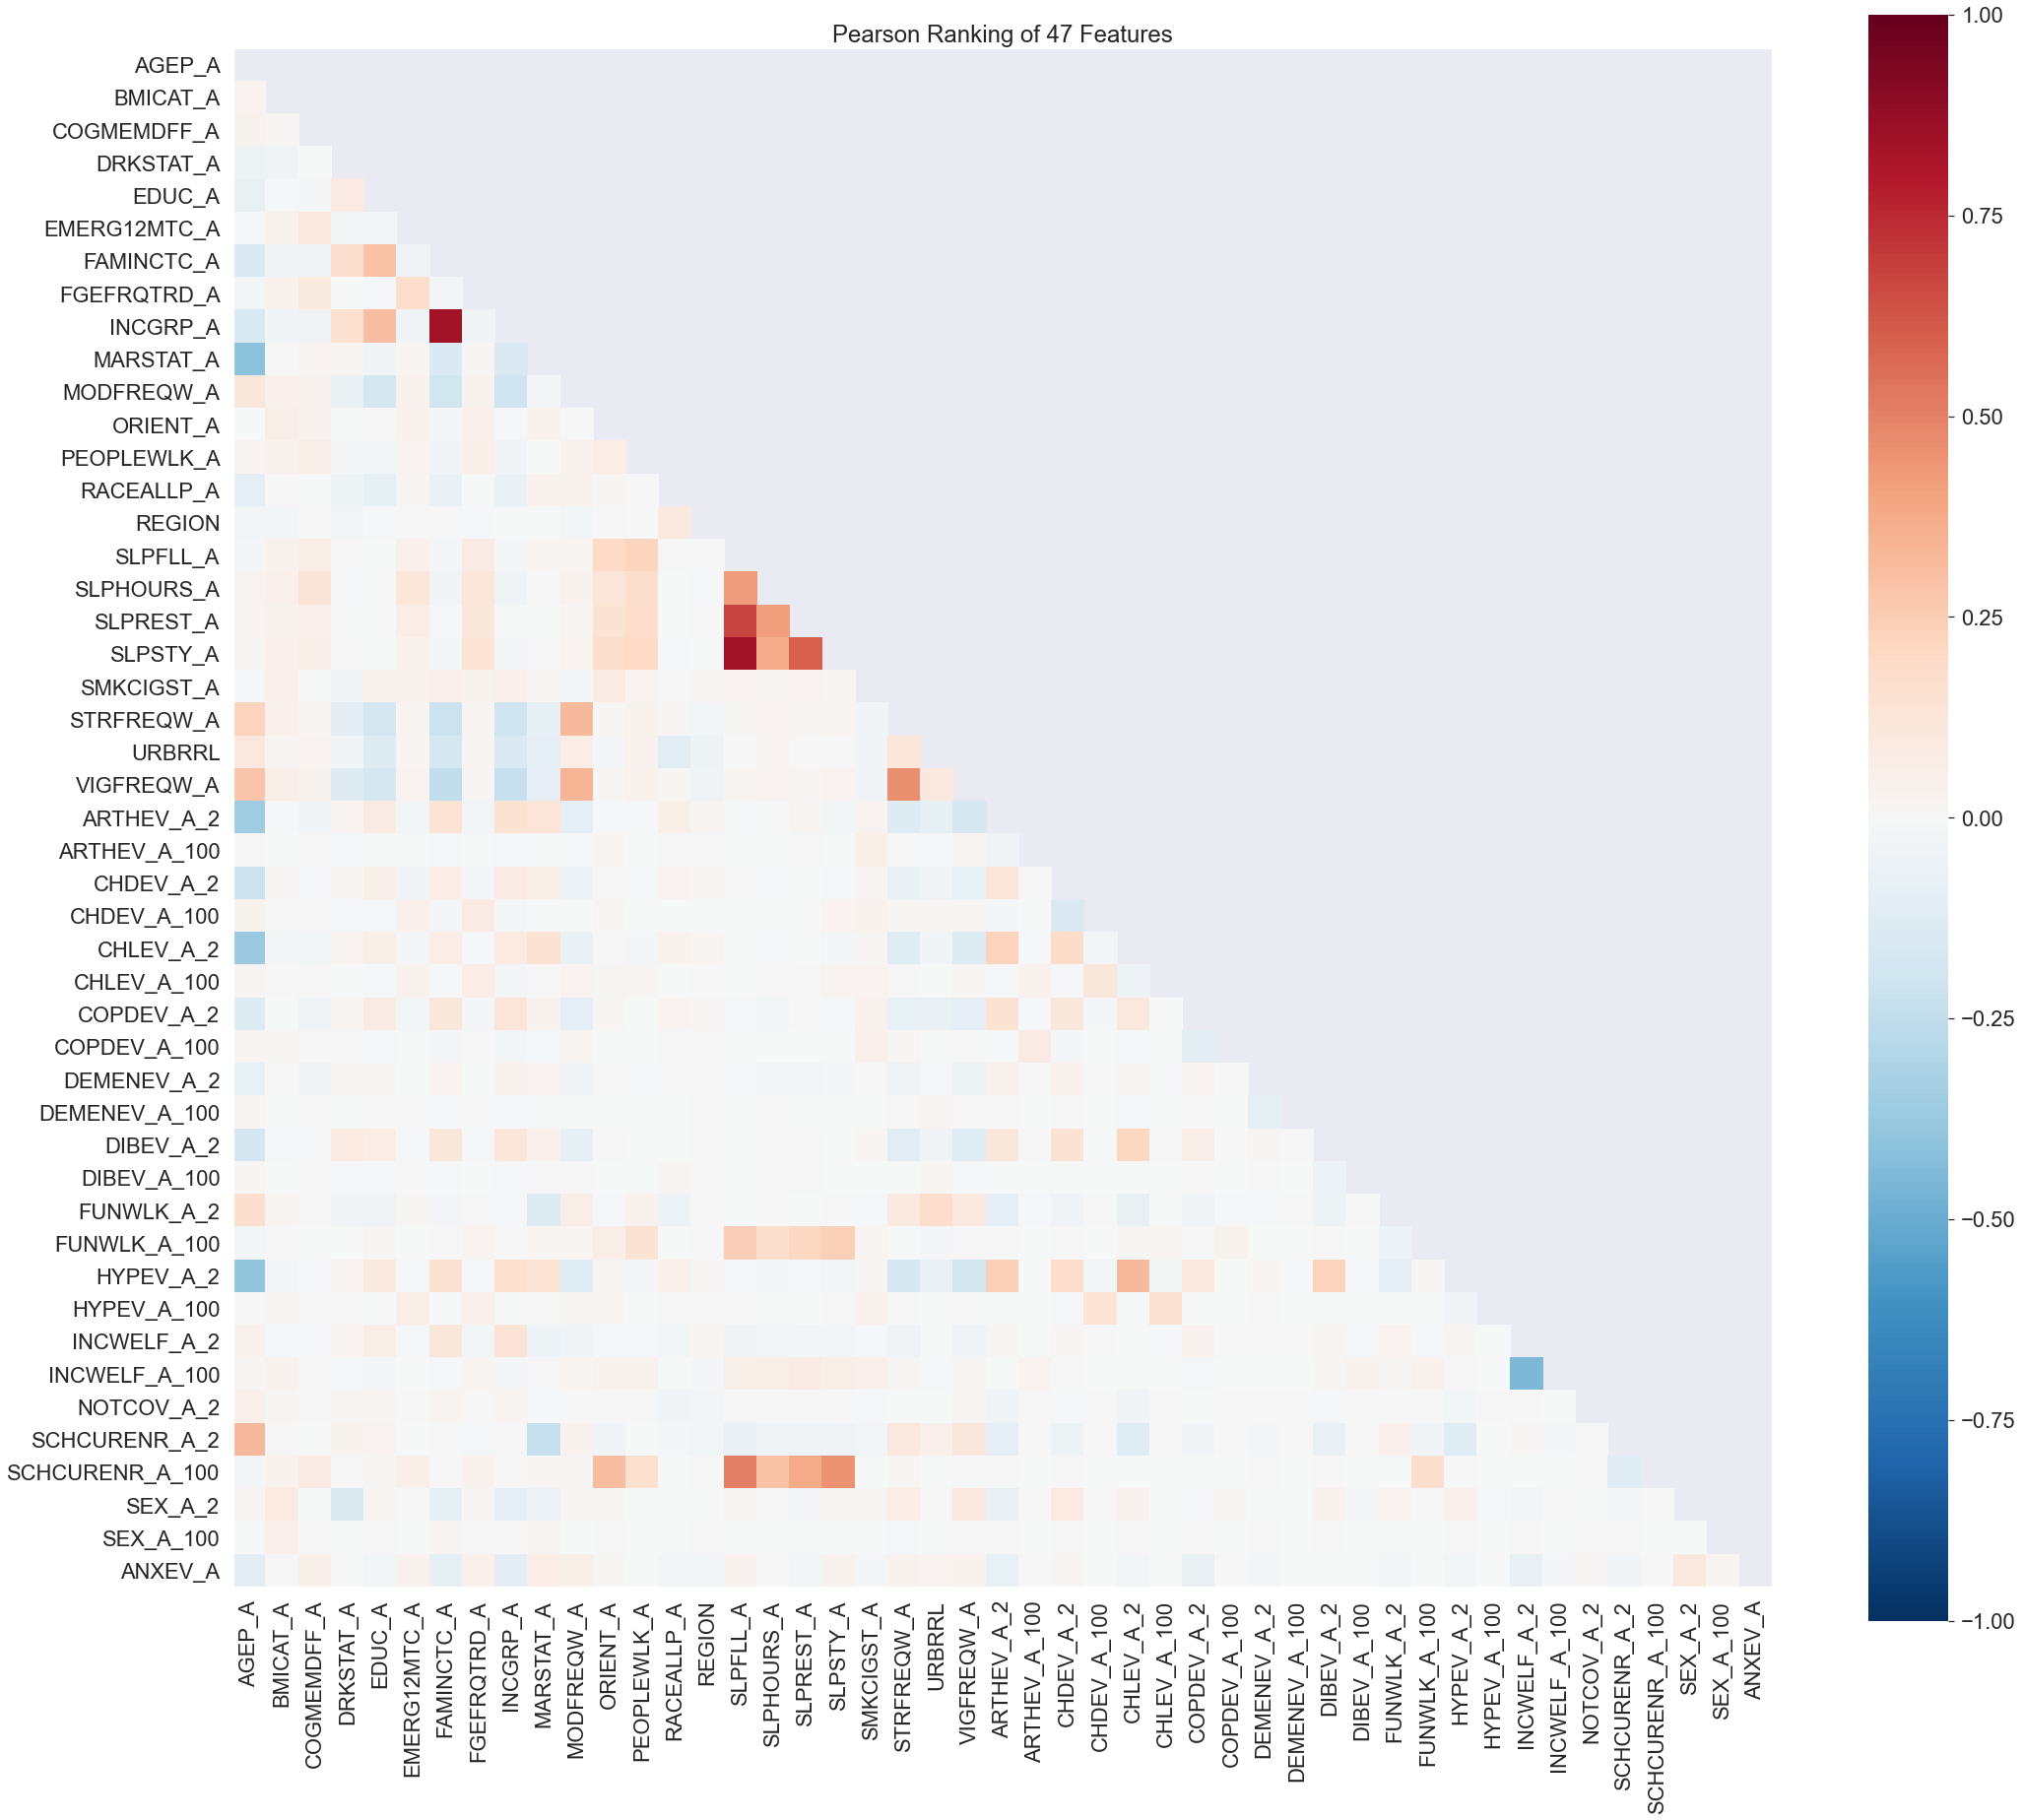

<AxesSubplot:title={'center':'Pearson Ranking of 47 Features'}>

In [22]:
# check the collinearity between pairs, drop if needed
sns.set(rc = {'figure.figsize':(35,30)})
sns.set(font_scale = 2)
visual_2d = Rank2D(algorithm = 'pearson', features = anxiety.columns.tolist())
visual_2d.fit(anxiety)
visual_2d.transform(anxiety)
visual_2d.show()

From this correlation plot, we can explicitly see that there is high statistical correlation between:
- {FAMINCTC_A (Sample adult family income), INCGRP_A (Sample adult family income (grouped))}
- {SLPFLL_A (Trouble falling asleep, past 30 days), SLPSTY_A (Trouble staying asleep, past 30 days)}

Also, it is easy to interpret why they are highly correlated literally.

In [148]:
anxiety_ = anxiety.drop(['INCGRP_A', 'SLPFLL_A'], axis = 1)
anxiety_

,AGEP_A,BMICAT_A,COGMEMDFF_A,DRKSTAT_A,EDUC_A,EMERG12MTC_A,FAMINCTC_A,FGEFRQTRD_A,MARSTAT_A,MODFREQW_A,...,HYPEV_A_2,HYPEV_A_100,INCWELF_A_2,INCWELF_A_100,NOTCOV_A_2,SCHCURENR_A_2,SCHCURENR_A_100,SEX_A_2,SEX_A_100,ANXEV_A
0,85,2,2,100,5,2,100000,1,1,94,...,1,0,1,0,1,1,0,0,0,0
1,32,2,1,6,100,0,65000,1,100,5,...,1,0,1,0,1,1,0,0,0,0
2,70,3,1,5,100,0,36000,2,4,7,...,0,0,1,0,1,1,0,1,0,0
3,32,4,1,2,100,0,30105,3,1,1,...,1,0,1,0,1,1,0,1,0,0
4,77,100,1,2,4,2,9000,2,4,94,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,56,4,1,3,4,0,85000,2,1,1,...,0,0,1,0,1,1,0,0,0,0
21886,60,2,1,3,100,1,34000,2,5,5,...,1,0,1,0,1,1,0,1,0,0
21887,55,4,1,5,6,0,60000,2,1,3,...,1,0,1,0,1,1,0,1,0,0
21888,66,4,2,100,5,0,27500,2,4,94,...,0,0,1,0,1,1,0,1,0,0


In [150]:
# standardize estimators which have significantly different scale from others
scaler = MinMaxScaler()
toscale_list = rv_['Variable Names'].loc[rv_['Type**'] != 'Target'].loc[rv_['Unique*'] > 5].tolist()
for i in toscale_list:
    anxiety_[i] = scaler.fit_transform(anxiety_[[i]])

anxiety_

,AGEP_A,BMICAT_A,COGMEMDFF_A,DRKSTAT_A,EDUC_A,EMERG12MTC_A,FAMINCTC_A,FGEFRQTRD_A,MARSTAT_A,MODFREQW_A,...,HYPEV_A_2,HYPEV_A_100,INCWELF_A_2,INCWELF_A_100,NOTCOV_A_2,SCHCURENR_A_2,SCHCURENR_A_100,SEX_A_2,SEX_A_100,ANXEV_A
0,0.817073,2,2,1.000000,0.05,0.02,0.40000,1,0.000000,0.94,...,1,0,1,0,1,1,0,0,0,0
1,0.170732,2,1,0.050505,1.00,0.00,0.26000,1,1.000000,0.05,...,1,0,1,0,1,1,0,0,0,0
2,0.634146,3,1,0.040404,1.00,0.00,0.14400,2,0.030303,0.07,...,0,0,1,0,1,1,0,1,0,0
3,0.170732,4,1,0.010101,1.00,0.00,0.12042,3,0.000000,0.01,...,1,0,1,0,1,1,0,1,0,0
4,0.719512,100,1,0.010101,0.04,0.02,0.03600,2,0.030303,0.94,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,0.463415,4,1,0.020202,0.04,0.00,0.34000,2,0.000000,0.01,...,0,0,1,0,1,1,0,0,0,0
21886,0.512195,2,1,0.020202,1.00,0.01,0.13600,2,0.040404,0.05,...,1,0,1,0,1,1,0,1,0,0
21887,0.451220,4,1,0.040404,0.06,0.00,0.24000,2,0.000000,0.03,...,1,0,1,0,1,1,0,1,0,0
21888,0.585366,4,2,1.000000,0.05,0.00,0.11000,2,0.030303,0.94,...,0,0,1,0,1,1,0,1,0,0


In [151]:
# split the dataset into predictor and prediction set
X = anxiety_.drop(['ANXEV_A'], axis = 1)
y = anxiety_.ANXEV_A
label = ['No', 'Yes']

#### You still remember the 'random oversampling' that I mentioned earlier? Finally, let's work on that!

In [152]:
# define oversampling strategy
oversample = RandomOverSampler(random_state = 5, sampling_strategy = 'minority')
X_os, y_os = oversample.fit_resample(X, y)

In [153]:
# print out the y after oversampling
y_os.value_counts()

0    18640
1    18640
Name: ANXEV_A, dtype: int64

([<matplotlib.axis.XTick at 0x1e32a803e20>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

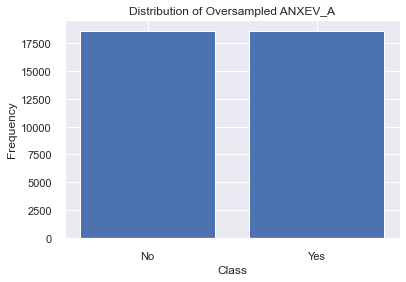

In [154]:
# visualize the distribution
freq = [y_os.value_counts()[0], y_os.value_counts()[1]]

sns.set(rc = {'figure.figsize':(6,4)})
sns.set(font_scale = 1)
plt.bar([0, 1], freq)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Oversampled ANXEV_A')
plt.xticks([0,1], label)

In [155]:
# Divide intro training and testing datasets, with a 30-70 ratio
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.3, random_state = 5)

### Feature Selection
Based on the fact that we are training a classification model, we cannot use Stepwise Selection. 
##### Instead, we played around with two methods for feature selection: 1) Feature score of Chi-squared test, 2) Feature importance (use a tree-based model as an example).

**Feature Selection: Part I**

In [30]:
# feature selection based on Chi-Squared score
feature_select = SelectKBest(score_func = chi2)
feature_select.fit(X_train, y_train)
feature_names_fs = feature_select.feature_names_in_

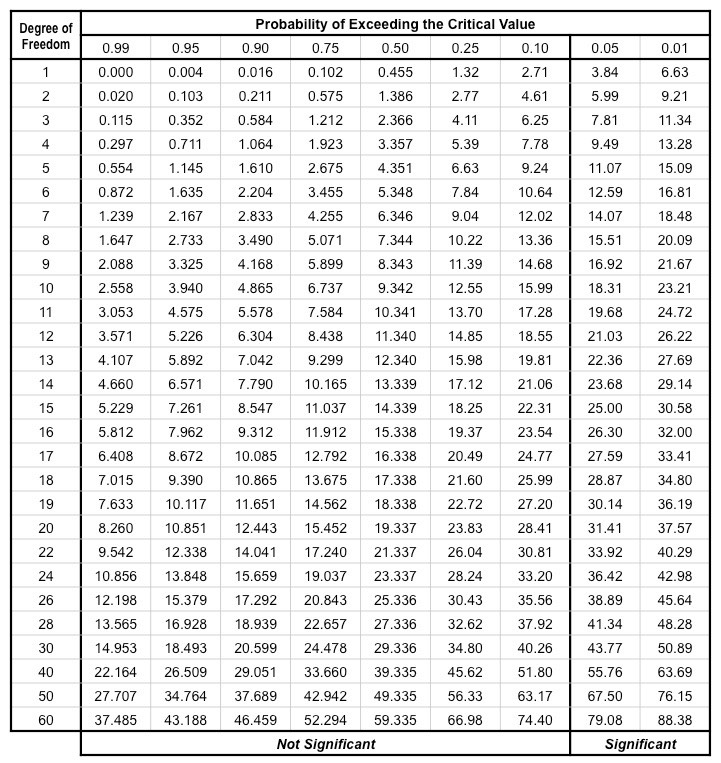

Table 1: Chi-squared Table

Source: https://ib.bioninja.com.au/higher-level/topic-10-genetics-and-evolu/102-inheritance/chi-squared-table.html

##### Given that our dataset has a degree freedom larger than 35,000, we choose to use the maximum threshold value of (df = 60) in this table as our threshold to select features.
- On a significance level of 0.95, the feature is statistically significant if its Chi2 score is higher than 79.08.

In [31]:
df_fs = pd.DataFrame({'Chi2 Score' :feature_select.scores_}, index = feature_names_fs)

# display the score table
print(df_fs.sort_values(by = 'Chi2 Score', ascending = False))

# print out statistically significant features
print('\nThe significant features are:',df_fs[df_fs['Chi2 Score'] > 79.08].index.tolist())

                 Chi2 Score
FGEFRQTRD_A      691.762461
COGMEMDFF_A      547.712807
SLPSTY_A         455.443643
SLPREST_A        356.829673
SEX_A_2          243.933416
MARSTAT_A        169.145800
BMICAT_A         160.987700
MODFREQW_A       115.433252
FAMINCTC_A        85.227058
ARTHEV_A_2        81.730130
AGEP_A            64.596591
VIGFREQW_A        34.667739
STRFREQW_A        24.246690
RACEALLP_A        23.800457
HYPEV_A_2         22.011152
EDUC_A            21.126767
REGION            21.077319
INCWELF_A_100     19.764455
PEOPLEWLK_A       19.145703
FUNWLK_A_2        18.546749
CHLEV_A_2         14.429722
URBRRL            14.350531
COPDEV_A_2        13.825970
EMERG12MTC_A       9.160721
INCWELF_A_2        7.898241
HYPEV_A_100        6.158500
SCHCURENR_A_2      5.462453
ORIENT_A           5.047550
SEX_A_100          5.046196
SCHCURENR_A_100    4.583314
COPDEV_A_100       1.362204
DEMENEV_A_100      0.990845
ARTHEV_A_100       0.972620
CHDEV_A_2          0.649894
CHDEV_A_100        0

##### Let's take a look what these variables are:

In [32]:
fs_list = ['COGMEMDFF_A', 'FAMINCTC_A', 'FGEFRQTRD_A', 'MARSTAT_A', 'MODFREQW_A', 'SLPREST_A', 'SLPSTY_A', 'ARTHEV_A', 'SEX_A']
descrip = []
for i in range(len(fs_list)):
    descrip.append(rv_['Description'].loc[rv_['Variable Names'] == fs_list[i]].tolist()[0])

pd.set_option('max_colwidth', 400)
fs = pd.DataFrame({'Variable':fs_list, 'Description':descrip})

# display the table
fs

,Variable,Description
0,COGMEMDFF_A,Do you have difficulty remembering or concentrating?
1,FAMINCTC_A,Sample adult family income
2,FGEFRQTRD_A,"How often tired, past 3m"
3,MARSTAT_A,Current Marital Status
4,MODFREQW_A,Frequency of moderate physical activity
5,SLPREST_A,"Wake up well rested, past 30 days"
6,SLPSTY_A,"Trouble staying asleep, past 30 days"
7,ARTHEV_A,Ever had arthritis
8,SEX_A,Sex


**It seems that the combination of socio-economic features such as `family income`, `sex`, `marrital status`, and physical condition features such as `feeling of tiredness`, `sleep quality` can best predict the `anxiety disorder` condtion.**

**Feature Selection: Part II**

In [33]:
# run a tree-based model 
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)

# find out the mean accuracy score
cv_error = np.mean(cross_val_score(forest, X_train, y_train, cv = 10, scoring = 'accuracy'))

importances = forest.feature_importances_
forest_importances = pd.DataFrame({'features': X.columns, 'importances': importances})

# print out the feature importances
forest_importances.sort_values(by = 'importances', ascending = False).reset_index(drop = True)

,features,importances
0,AGEP_A,0.066812
1,FGEFRQTRD_A,0.056676
2,FAMINCTC_A,0.054124
3,COGMEMDFF_A,0.048762
4,SLPREST_A,0.046248
5,SLPSTY_A,0.045317
6,SLPHOURS_A,0.042884
7,MODFREQW_A,0.042724
8,REGION,0.041683
9,DRKSTAT_A,0.041370


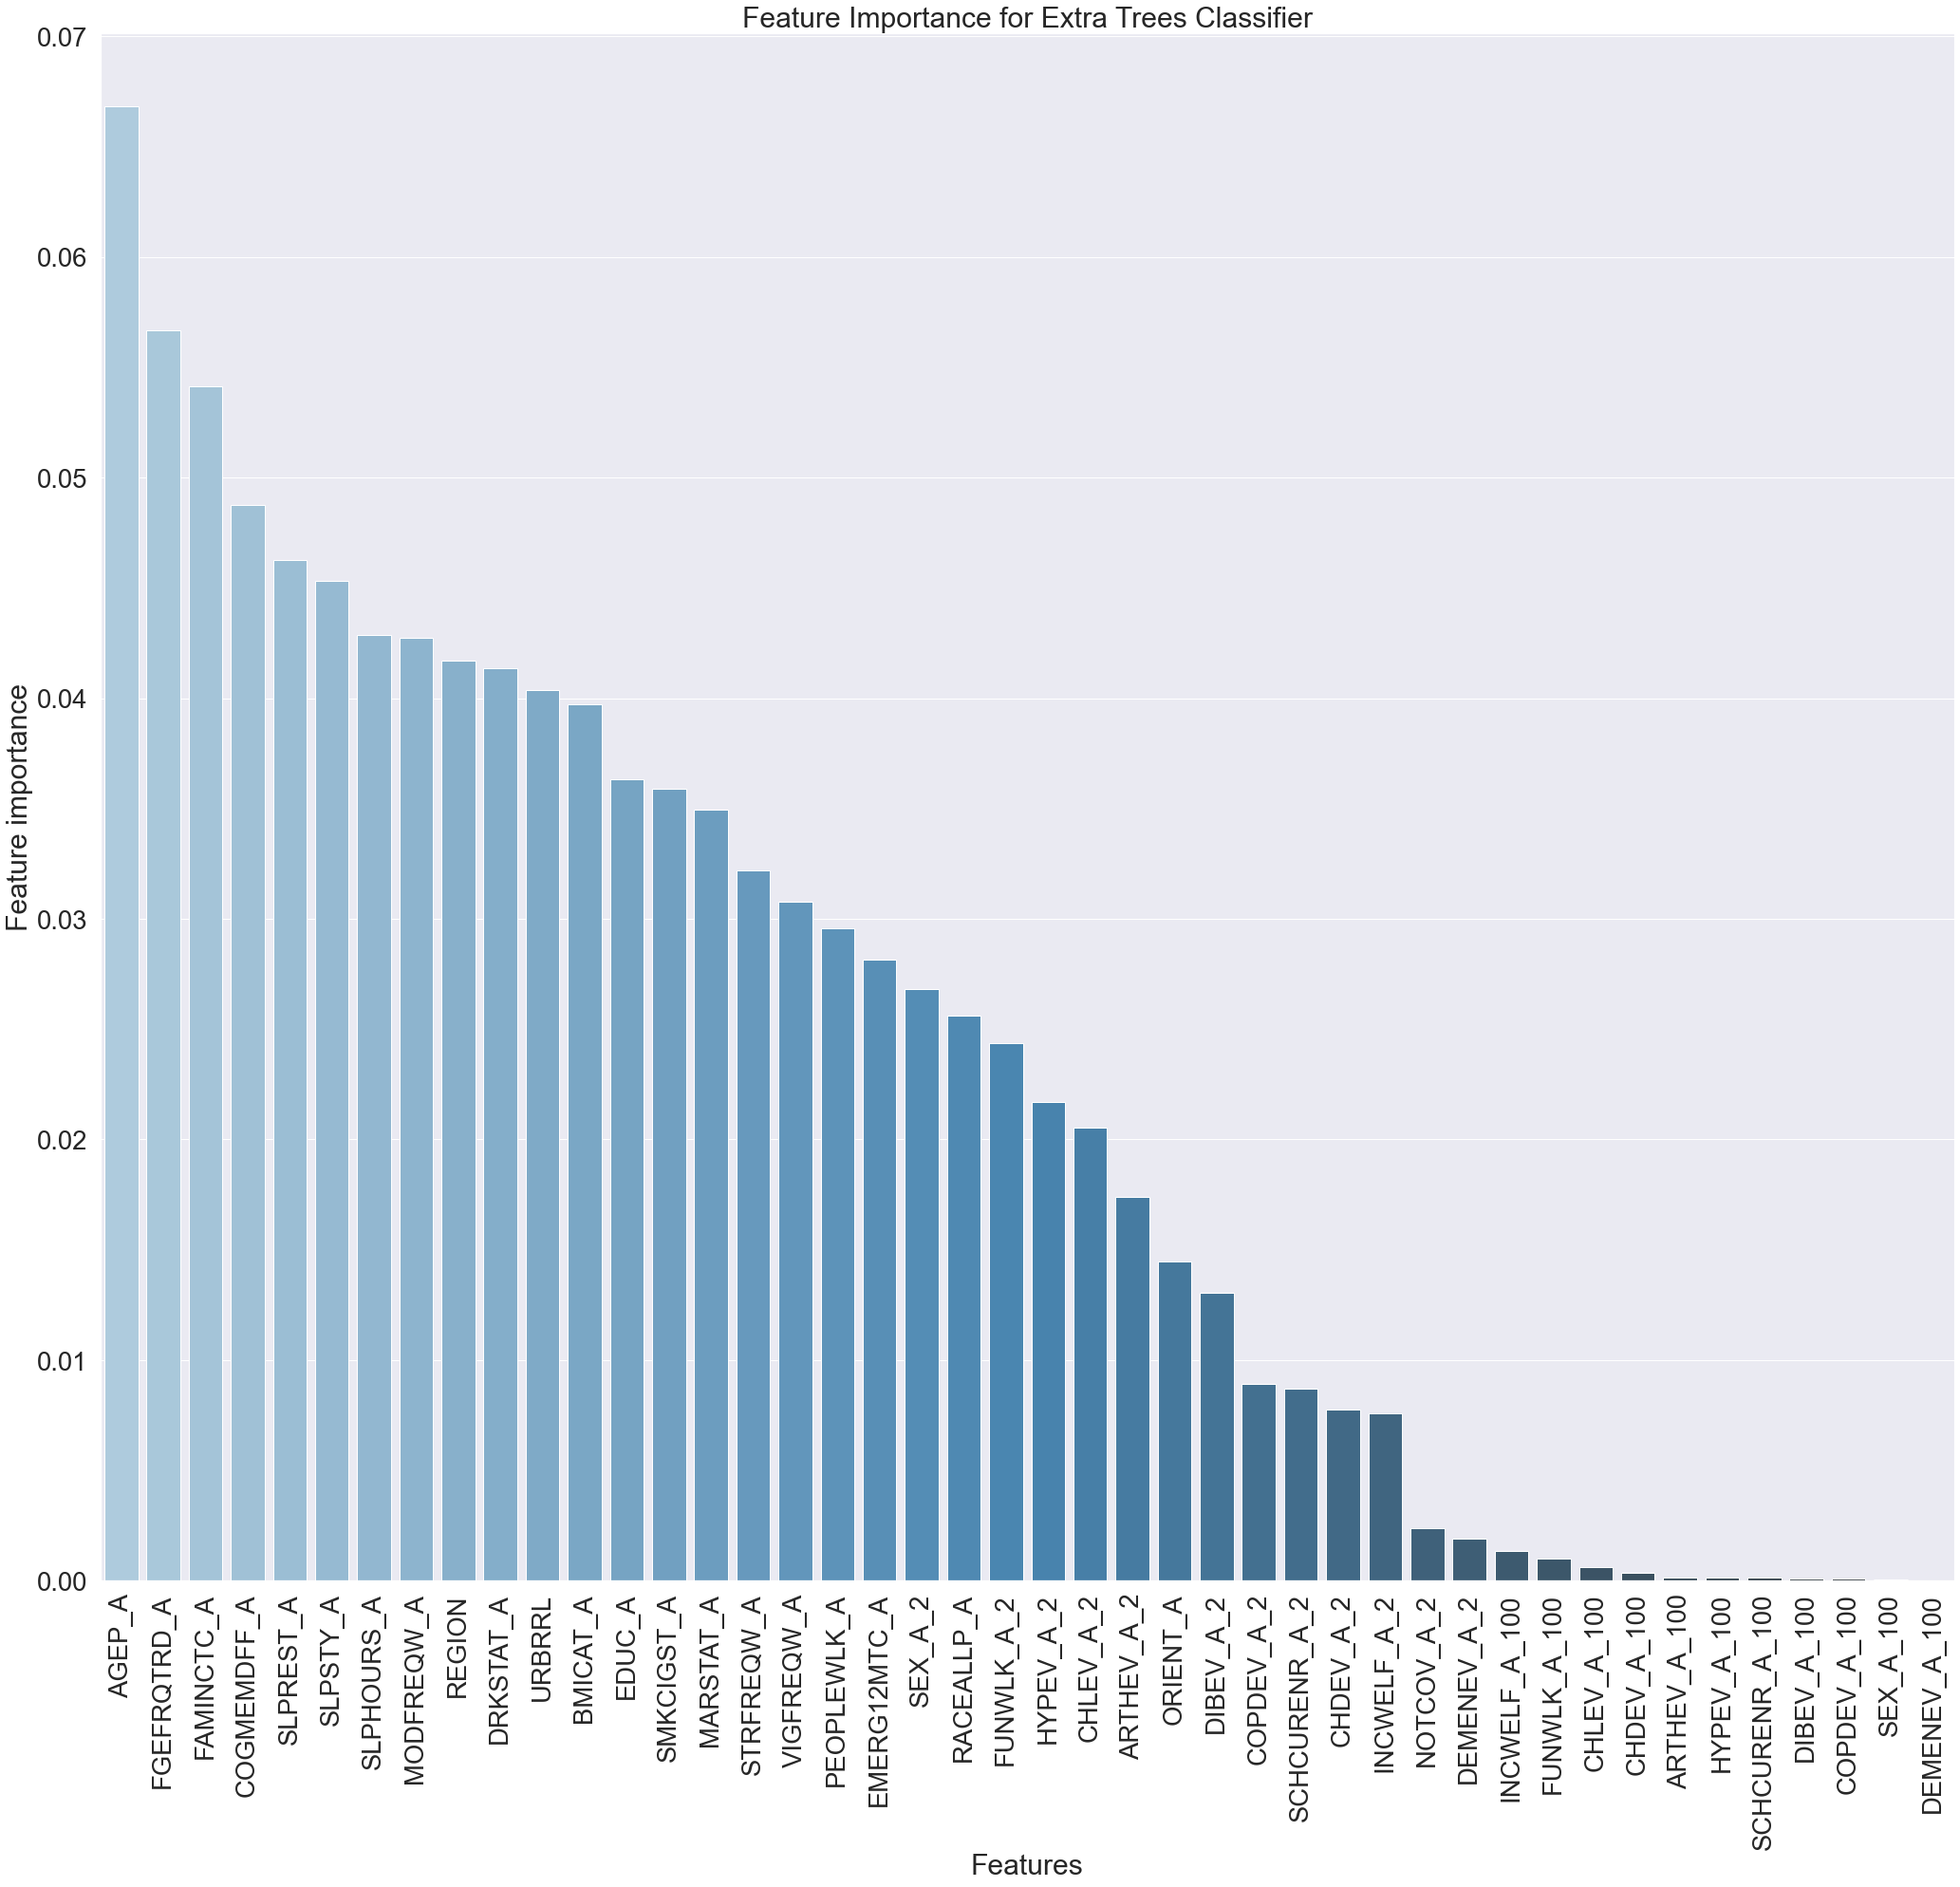

In [34]:
# plot the feature importances
sns.set(rc = {'figure.figsize':(35,30)})
sns.set(font_scale = 2.5)
sns.barplot(x = "features", y = "importances" , data = forest_importances,
            order = forest_importances.sort_values('importances', ascending = False).features, palette = "Blues_d")
plt.xticks(rotation = 90)
plt.title("Feature Importance for Extra Trees Classifier")
plt.ylabel("Feature importance")
plt.xlabel("Features")
fig.tight_layout()

From this plot, we can identify the top 3 most important features:
1. 'MHTHRPY_A': During the past 12 months, did you receive counseling or therapy from a mental health professional such as a psychiatrist, psychologist, psychiatric nurse, or clinical social worker?
2. 'AGEP_A': Age of the sample adults
3. 'FAMINCTC_A': Sample adult family income

**In this case, we set a threshold of (fi) = mean importance value. Features with importances below this threshold will be treated as insignificant features, so we rule them out.**

In [35]:
# filter by FI = mean(FI_i)
feature_important = forest_importances[forest_importances['importances'] >= importances.mean()].sort_values(by = 'importances', 
                                                                           ascending = False).reset_index(drop = True)
feature_important

,features,importances
0,AGEP_A,0.066812
1,FGEFRQTRD_A,0.056676
2,FAMINCTC_A,0.054124
3,COGMEMDFF_A,0.048762
4,SLPREST_A,0.046248
5,SLPSTY_A,0.045317
6,SLPHOURS_A,0.042884
7,MODFREQW_A,0.042724
8,REGION,0.041683
9,DRKSTAT_A,0.041370


##### Then, we refit the model using the selected features, in order to check if the mean accuracy score from the cross-validation improves

In [36]:
forest_select = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

cv_error_select = np.mean(cross_val_score(forest_select, X_train[feature_important['features'].tolist()], y_train, cv = 10, scoring = 'accuracy'))
print('The mean accuracy score before selection:', cv_error, '\n')
print('The mean accuracy score after selection:', cv_error_select)

The mean accuracy score before selection: 0.9814145846458399 

The mean accuracy score after selection: 0.9795369697290106


##### Hmmmm, the performance didn't really get improved after the selection. 
##### Never mind! Let's first put all features into out models. In the model tuning part, we will apply feature selection based on the feature importances in each model, and check if the performance metrics get improved.

# Model Evaluation

In [37]:
def evalClassModel(model, y_test, y_pred_test, plot=False):
    # Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', accuracy_score(y_test, y_pred_test), '\n')
    
    # Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of class = 1:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of class = 0:', 1 - y_test.mean())
    
    # Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_test[0:25])
    
    # Conclusion:
    # Classification accuracy is the easiest classification metric to understand
    # But, it does not tell the underlying distribution of response values
    # And, it does not tell what "types" of errors that the classifier is making
    
    #Confusion matrix
    
    # print out the classification report
    print(classification_report(y_test, y_pred_test, digits = 3))
    
    # save confusion matrix and slice into four pieces
    confusion = confusion_matrix(y_test, y_pred_test)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.set(font_scale = 2)
    sns.set(rc = {'figure.figsize':(10,8)})
    display = ConfusionMatrixDisplay(confusion_matrix = confusion, 
                                     display_labels = ['Class = 0', 'Class = 1'])
    display.plot()
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = accuracy_score(y_test, y_pred_test)
    print('Classification Accuracy:', round(accuracy, 5), '\n')
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', round((1 - accuracy_score(y_test, y_pred_test)), 5), '\n')
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', round(false_positive_rate, 5), '\n')
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', round(precision_score(y_test, y_pred_test), 5), '\n')
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', round(roc_auc_score(y_test, y_pred_test), 5), '\n')
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', round(cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean(), 5), '\n')
    
    ##########################################
    # Adjusting the classification threshold
    
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    ##########################################
    # ROC Curves and Area Under the Curve (AUC)
    
    # see how sensitivity and specificity are affected by various thresholds
    # Higher AUC = better classifier
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

## KNN Classification

First model to explore is KNN Classification model.

In this part, we first tuned the parameter of knn model manually, just like what we are accustomed to do in our assignment. Then, to double check the result, we tuned the parameter using GridSearchCV.

In [38]:
def knn():
    cv_error = []
    accuracy = []
    for i in range(1, 30):
        model = KNeighborsClassifier(n_neighbors = i)
        # use cv to find the model with the highest mean accuracy
        CV_error = np.mean(cross_val_score(model, X_train, y_train,
                                           scoring = 'accuracy', cv = 10))
        cv_error.append(CV_error)
        print("------------")
        print("k =",i)
        print("Accuracy (CV_error): ",CV_error)
    
    x_graph = [i for i in range(1,30)]
    plt.plot(x_graph, cv_error)
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("CV Error")
    plt.show()
    # get the best knn model in terms of the accuracy

------------
k = 1
Accuracy (CV_error):  0.9088746881190808
------------
k = 2
Accuracy (CV_error):  0.8797511854779139
------------
k = 3
Accuracy (CV_error):  0.8305478236989847
------------
k = 4
Accuracy (CV_error):  0.8024971914196218
------------
k = 5
Accuracy (CV_error):  0.7762482506032022
------------
k = 6
Accuracy (CV_error):  0.7556325804135111
------------
k = 7
Accuracy (CV_error):  0.7432936534160415
------------
k = 8
Accuracy (CV_error):  0.7300733681964435
------------
k = 9
Accuracy (CV_error):  0.7220261135562281
------------
k = 10
Accuracy (CV_error):  0.715397056167202
------------
k = 11
Accuracy (CV_error):  0.7124079189484089
------------
k = 12
Accuracy (CV_error):  0.7065059938409485
------------
k = 13
Accuracy (CV_error):  0.7052798667741638
------------
k = 14
Accuracy (CV_error):  0.7022146592476088
------------
k = 15
Accuracy (CV_error):  0.703939134942558
------------
k = 16
Accuracy (CV_error):  0.6988806503864461
------------
k = 17
Accuracy (CV_er

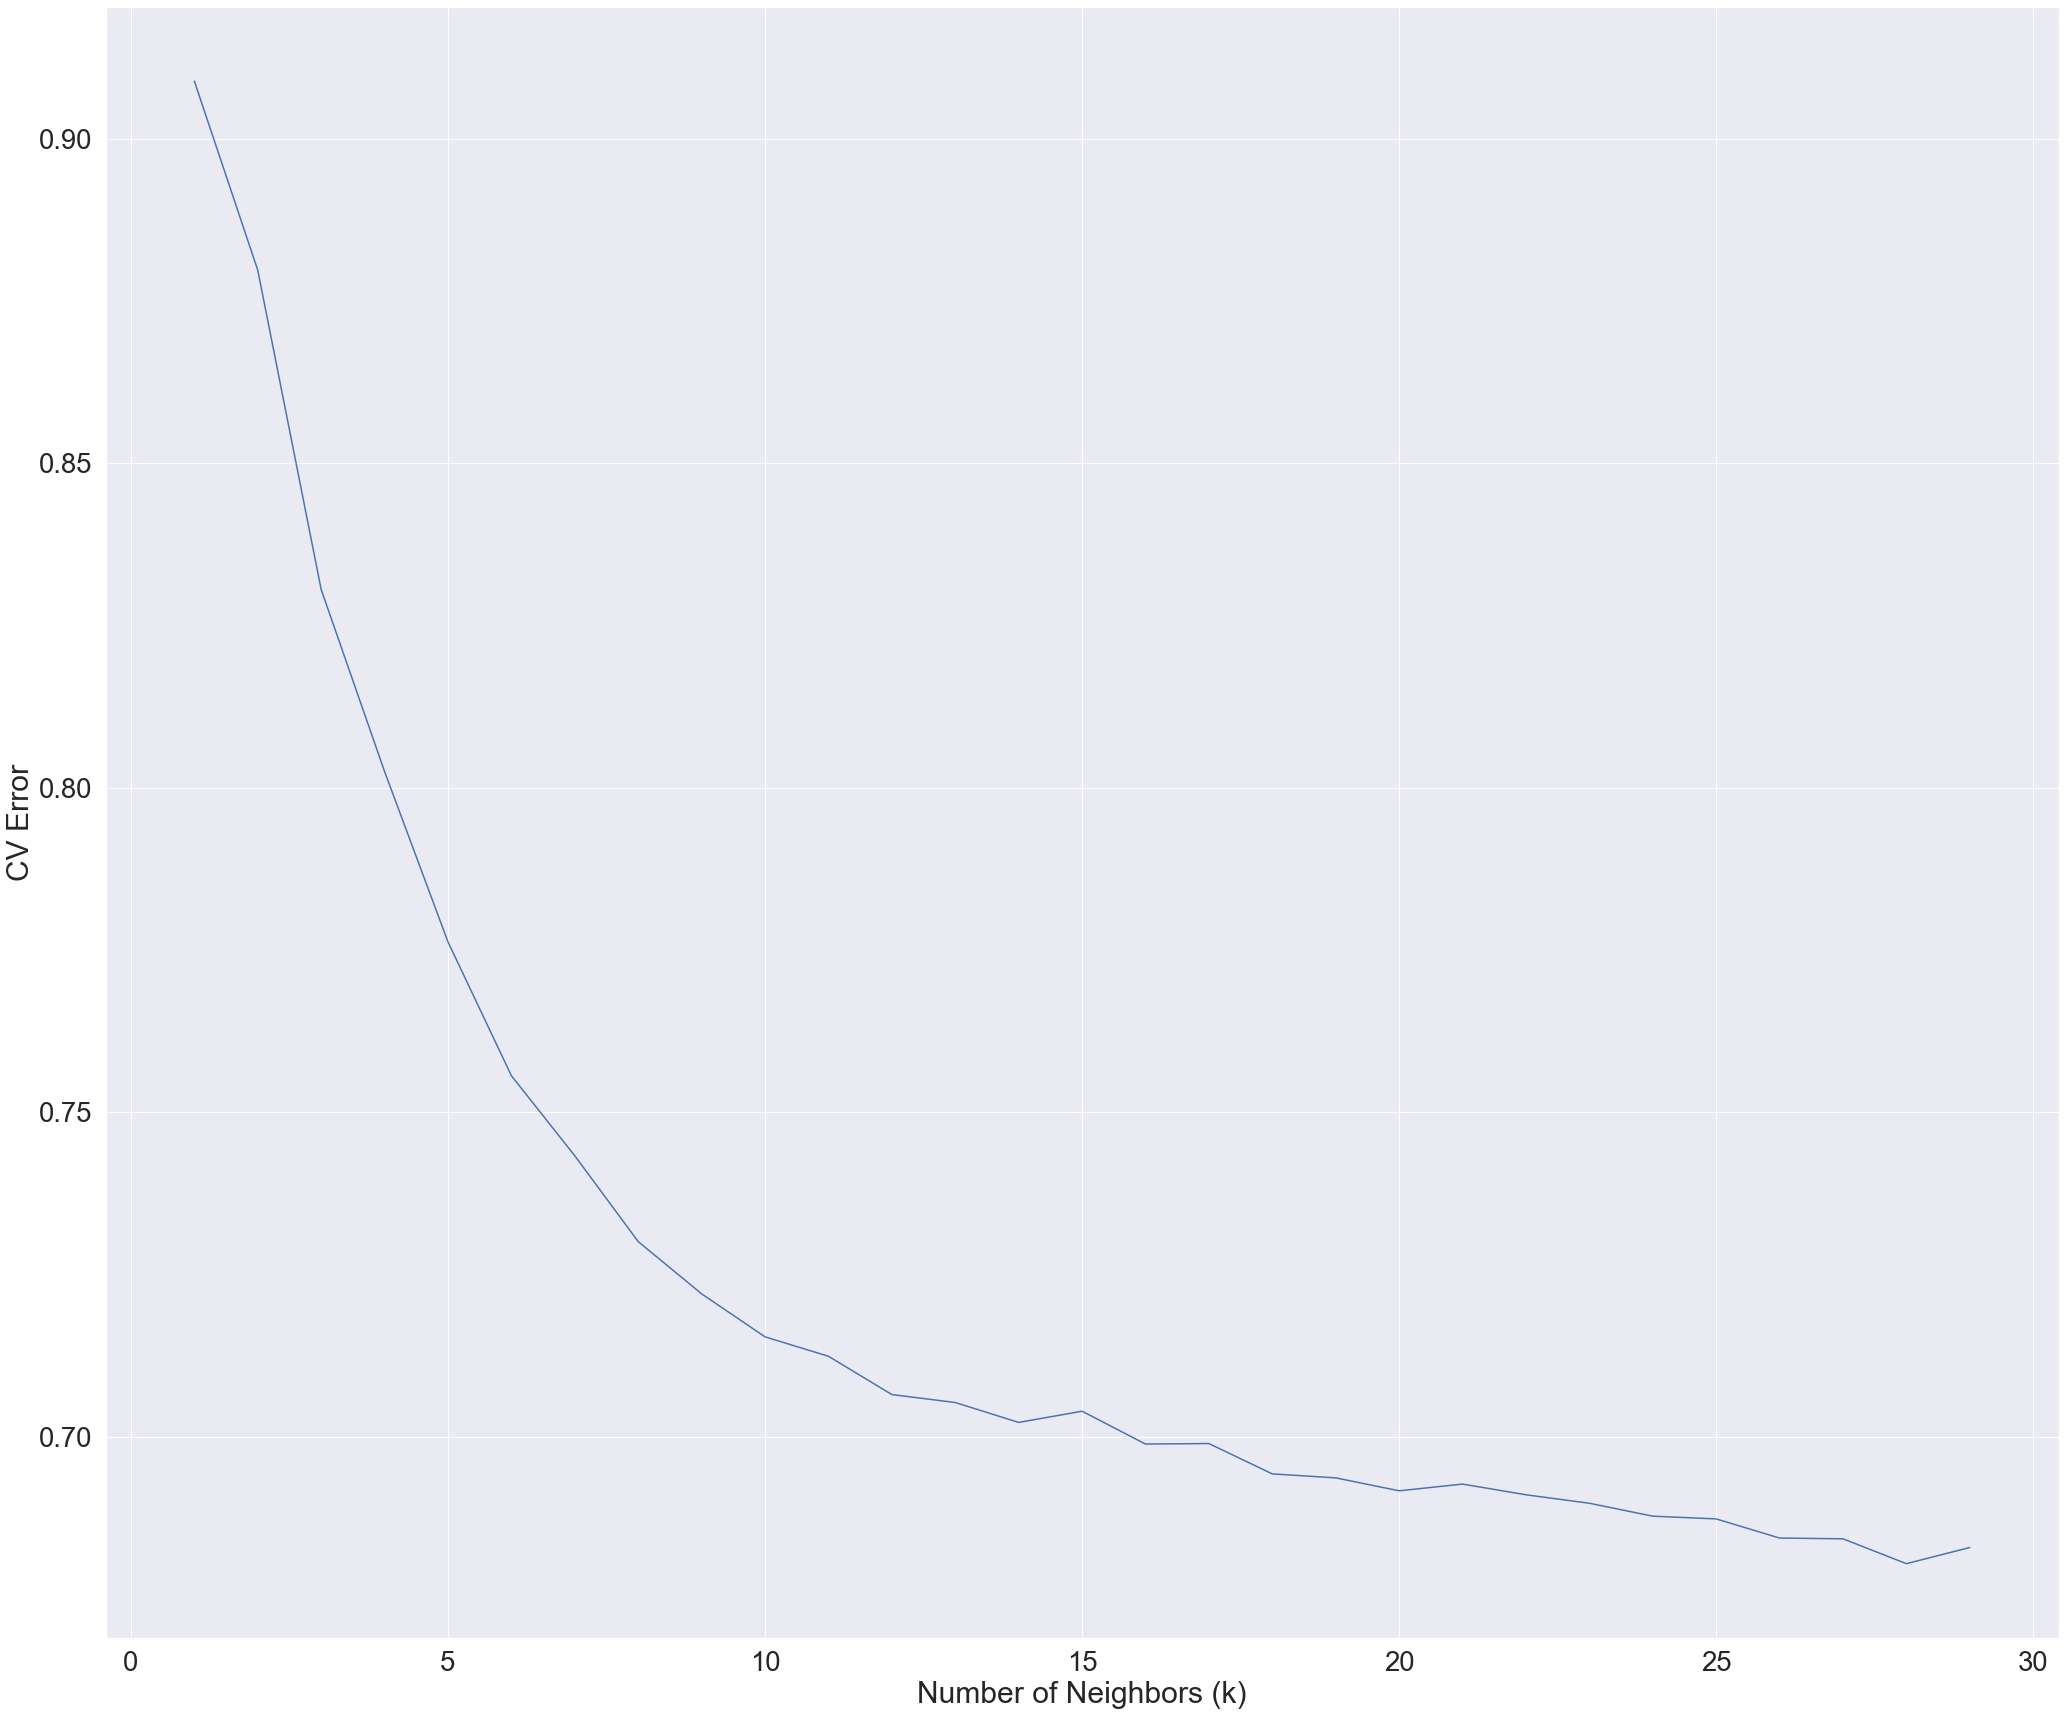

In [39]:
knn()

From the plot, k = 1 is obviously the optimal parameter. Although the trained model has the highest accuracy, there are some points that we should pay attention to:

When k=1, we estimate your probability based on a single sample: the closest neighbor.

The model is now 'perfectly' tuned to the data in the training set.

Also, the model becomes very sensitive to all sort of distortions like noise, outliers, mislabelling of data, and so on.

##### Tuning with GridSearchCV

GridSearchCV is brand new to us. But it is worth practicing, let's see if it is more efficient in model tuning.

In [40]:
def gridsearchcv(model):
    k_range = [i for i in range(1, 30)]
    params = dict(n_neighbors = k_range)
    
    grid_search = GridSearchCV(estimator = model, param_grid = params, 
                               cv = 10, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

In [41]:
gridsearchcv(KNeighborsClassifier())

{'n_neighbors': 1}
0.9088746881190808


The optimal K is 1. 

In the following models, we will proceed with using GridSearchCV to tune the model and pick up the optimal hyperparameters.

##### Re-train the model using optimal parameter

########### KNeighborsClassifier ###############
Accuracy: 0.9160407725321889 

Null accuracy:
 1    5652
0    5532
Name: ANXEV_A, dtype: int64
Percentage of class = 1: 0.5053648068669528
Percentage of class = 0: 0.49463519313304716
True: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0]
Pred: [0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0      0.985     0.843     0.909      5532
           1      0.866     0.987     0.922      5652

    accuracy                          0.916     11184
   macro avg      0.925     0.915     0.915     11184
weighted avg      0.925     0.916     0.916     11184



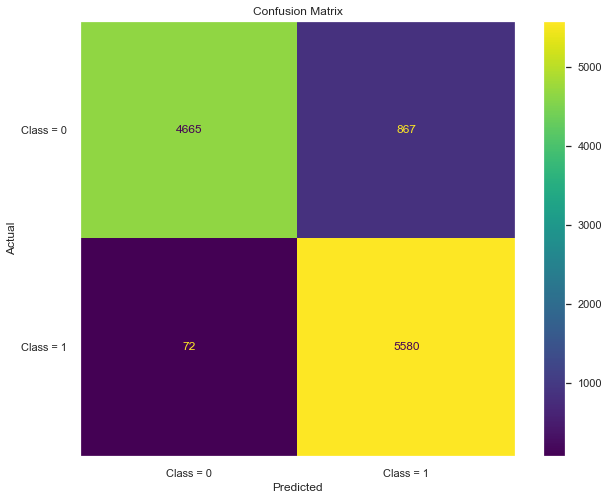

Classification Accuracy: 0.91604 

Classification Error: 0.08396 

False Positive Rate: 0.15672 

Precision: 0.86552 

AUC Score: 0.91527 

Cross-validated AUC: 0.90922 

First 10 predicted responses:
 [0 1 0 0 1 1 1 1 1 1]
First 10 predicted probabilities of class members:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


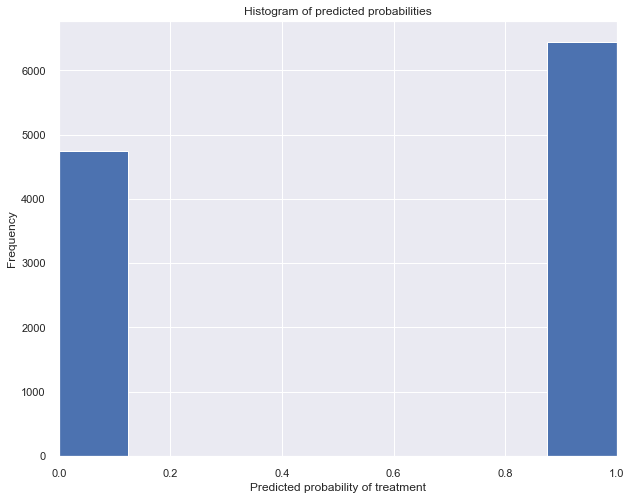

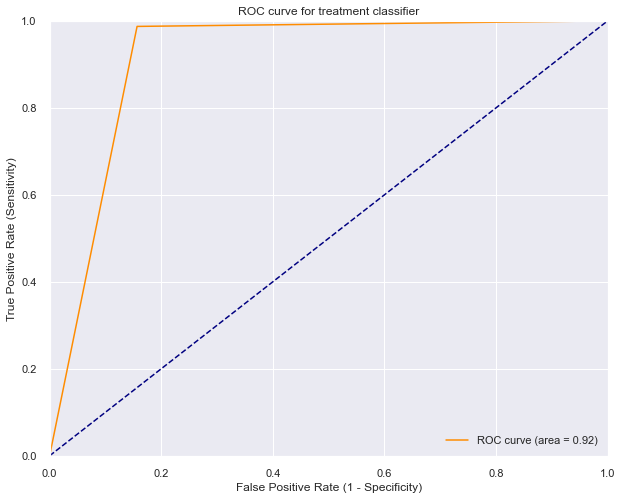

In [42]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('########### KNeighborsClassifier ###############')
evalClassModel(knn, y_test, knn_pred, True)

# Naive Bayes

########### NaiveBayesClassifier ###############
Accuracy: 0.5492668097281831 

Null accuracy:
 1    5652
0    5532
Name: ANXEV_A, dtype: int64
Percentage of class = 1: 0.5053648068669528
Percentage of class = 0: 0.49463519313304716
True: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0]
Pred: [1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0      0.527     0.874     0.657      5532
           1      0.652     0.231     0.342      5652

    accuracy                          0.549     11184
   macro avg      0.590     0.553     0.499     11184
weighted avg      0.590     0.549     0.498     11184



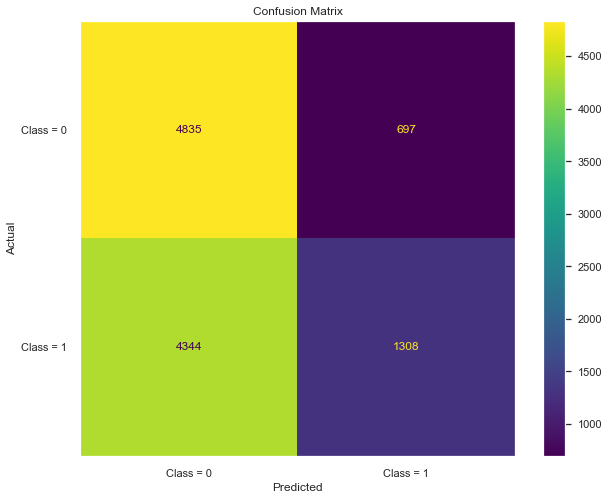

Classification Accuracy: 0.54927 

Classification Error: 0.45073 

False Positive Rate: 0.12599 

Precision: 0.65237 

AUC Score: 0.55271 

Cross-validated AUC: 0.6574 

First 10 predicted responses:
 [1 0 0 0 0 0 1 1 0 0]
First 10 predicted probabilities of class members:
 [[4.52709955e-01 5.47290045e-01]
 [8.75920904e-01 1.24079096e-01]
 [9.79122444e-01 2.08775564e-02]
 [9.48349647e-01 5.16503535e-02]
 [6.56118220e-01 3.43881780e-01]
 [9.56289807e-01 4.37101934e-02]
 [2.95438441e-07 9.99999705e-01]
 [1.06312888e-02 9.89368711e-01]
 [9.72676818e-01 2.73231821e-02]
 [9.77621148e-01 2.23788521e-02]]


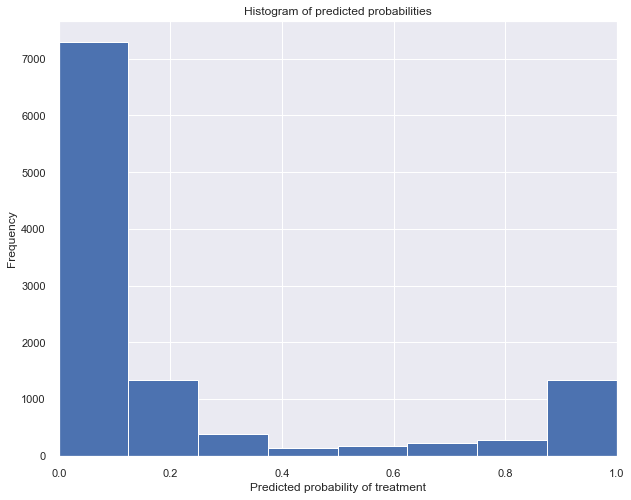

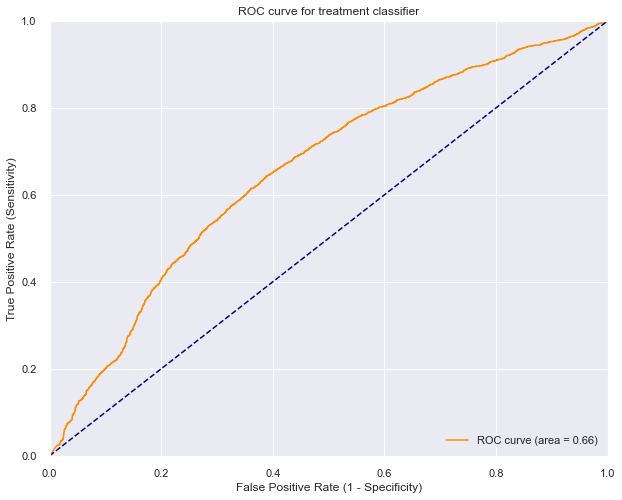

In [43]:
nb = GaussianNB().fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print('########### NaiveBayesClassifier ###############')
evalClassModel(nb, y_test, nb_pred, True)

# Logistic Regression

########### Logistic Regression ###############
Accuracy: 0.6880364806866953 

Null accuracy:
 1    5652
0    5532
Name: ANXEV_A, dtype: int64
Percentage of class = 1: 0.5053648068669528
Percentage of class = 0: 0.49463519313304716
True: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0]
Pred: [0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0]
              precision    recall  f1-score   support

           0      0.670     0.728     0.698      5532
           1      0.709     0.649     0.678      5652

    accuracy                          0.688     11184
   macro avg      0.689     0.688     0.688     11184
weighted avg      0.690     0.688     0.688     11184



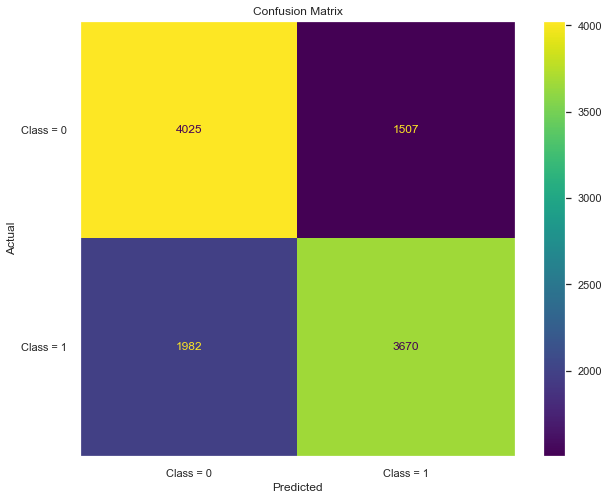

Classification Accuracy: 0.68804 

Classification Error: 0.31196 

False Positive Rate: 0.27242 

Precision: 0.7089 

AUC Score: 0.68846 

Cross-validated AUC: 0.75064 

First 10 predicted responses:
 [0 1 0 0 1 0 1 1 0 0]
First 10 predicted probabilities of class members:
 [[0.62618578 0.37381422]
 [0.38926696 0.61073304]
 [0.79052579 0.20947421]
 [0.76201032 0.23798968]
 [0.24511889 0.75488111]
 [0.58810788 0.41189212]
 [0.13710658 0.86289342]
 [0.17277859 0.82722141]
 [0.50908927 0.49091073]
 [0.59666968 0.40333032]]


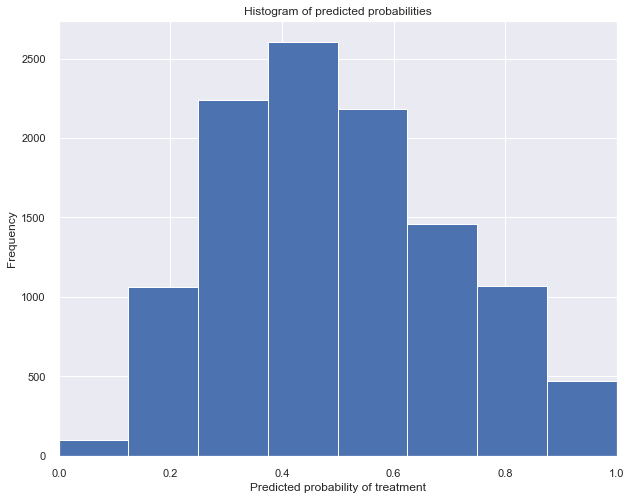

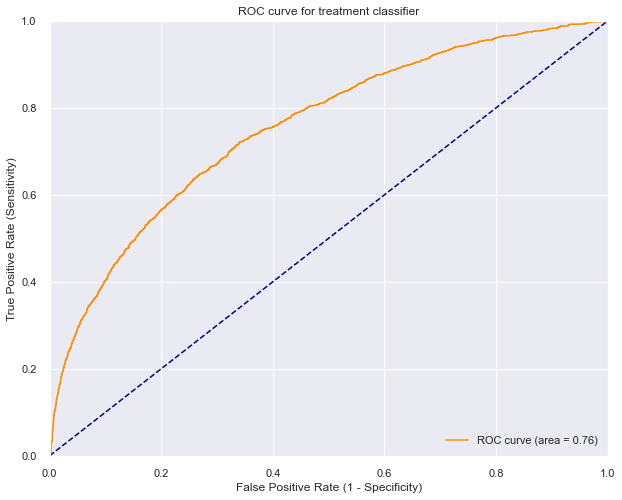

In [156]:
logreg = LogisticRegression(penalty = 'l2', max_iter = 1000).fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print('########### Logistic Regression ###############')
evalClassModel(logreg, y_test, logreg_pred, True)

In [157]:
# create a SelectFromModel object
model = SelectFromModel(logreg, prefit = True) # threshold for selection is the mean value of feature importances

X_train.columns[model.get_support()]

Index(['AGEP_A', 'COGMEMDFF_A', 'EMERG12MTC_A', 'FAMINCTC_A', 'SMKCIGST_A',
       'ARTHEV_A_100', 'CHDEV_A_100', 'CHLEV_A_100', 'COPDEV_A_2',
       'COPDEV_A_100', 'DEMENEV_A_100', 'HYPEV_A_100', 'INCWELF_A_2',
       'INCWELF_A_100', 'SEX_A_2', 'SEX_A_100'],
      dtype='object')

In [158]:
fs_list = ['AGEP_A', 'COGMEMDFF_A', 'EMERG12MTC_A', 'FAMINCTC_A', 'SMKCIGST_A',
       'ARTHEV_A', 'CHDEV_A', 'COPDEV_A','DEMENEV_A', 'HYPEV_A', 'INCWELF_A', 'SEX_A']

descrip = []
for i in range(len(fs_list)):
    descrip.append(rv_['Description'].loc[rv_['Variable Names'] == fs_list[i]].tolist()[0])

pd.set_option('max_colwidth', 400)
fs = pd.DataFrame({'Variable':fs_list, 'Description':descrip})

# display the feature table
fs

,Variable,Description
0,AGEP_A,Age of SA
1,COGMEMDFF_A,Do you have difficulty remembering or concentrating?
2,EMERG12MTC_A,"Number of times visited hospital emergency room, past 12m, top-coded"
3,FAMINCTC_A,Sample adult family income
4,SMKCIGST_A,Cigarette smoking status
5,ARTHEV_A,Ever had arthritis
6,CHDEV_A,Ever been told you had coronary heart disease
7,COPDEV_A,"Ever been told you had COPD, emphysema, or chronic bronchitis?"
8,DEMENEV_A,Ever had dementia
9,HYPEV_A,Ever been told you had hypertension


              precision    recall  f1-score   support

           0      0.633     0.715     0.671      5532
           1      0.680     0.594     0.634      5652

    accuracy                          0.654     11184
   macro avg      0.657     0.654     0.653     11184
weighted avg      0.657     0.654     0.653     11184



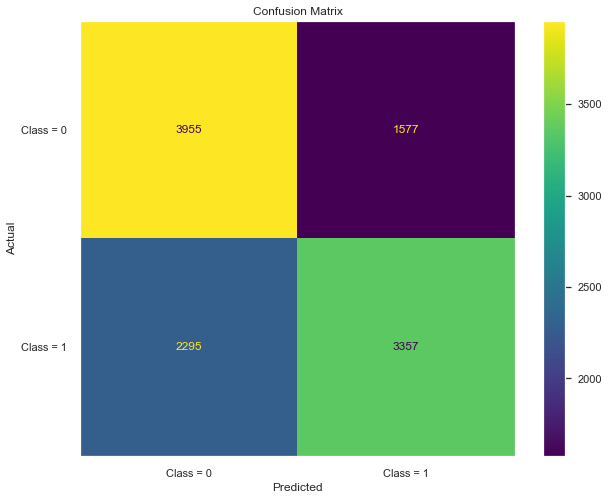

In [159]:
X_train_fs = model.transform(X_train.values)
X_test_fs = model.transform(X_test.values)

logreg_fs = LogisticRegression(penalty = 'l2', max_iter = 1000).fit(X_train_fs, y_train)
logreg_pred_fs = logreg_fs.predict(X_test_fs)

# print out the classification report
print(classification_report(y_test, logreg_pred_fs, digits = 3))

confusion = confusion_matrix(y_test, logreg_pred_fs)
# visualize Confusion Matrix
sns.set(font_scale = 2)
sns.set(rc = {'figure.figsize':(10,8)})
display = ConfusionMatrixDisplay(confusion_matrix = confusion, 
                                     display_labels = ['Class = 0', 'Class = 1'])
display.plot()
plt.grid(False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tree-based Classifier
In this part, we explored two types of tree-based model: 1) Decision Tree Classifier, 2) Random Forest Classifier.

### Part I: Decision Tree Classifier

In [52]:
# create a function of gridsearchcv
# tune the model, choose the best set of hyperparameters
def gridsearchcv_clf(model):
    params = {
        'max_depth' : [n for n in range(5, 51, 5)],
        'min_samples_split' : [n for n in range(10, 1, -2)],
        'min_samples_leaf' : [n for n in range(10, 1, -2)],
        'max_features' : ['sqrt', 'log2']
        }

    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, scoring = 'accuracy', n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

In [53]:
# run the gridsearchcv
clf = DecisionTreeClassifier(random_state = 5)
gridsearchcv_clf(clf)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}
0.850321727471514


########### DecisionTreeClassifier ###############
Accuracy: 0.8581008583690987 

Null accuracy:
 1    5652
0    5532
Name: ANXEV_A, dtype: int64
Percentage of class = 1: 0.5053648068669528
Percentage of class = 0: 0.49463519313304716
True: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0]
Pred: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0      0.907     0.795     0.847      5532
           1      0.821     0.920     0.868      5652

    accuracy                          0.858     11184
   macro avg      0.864     0.857     0.857     11184
weighted avg      0.863     0.858     0.857     11184



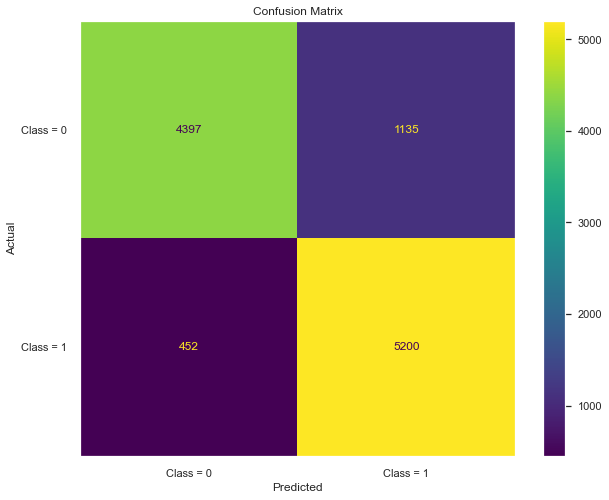

Classification Accuracy: 0.8581 

Classification Error: 0.1419 

False Positive Rate: 0.20517 

Precision: 0.82084 

AUC Score: 0.85743 

Cross-validated AUC: 0.89552 

First 10 predicted responses:
 [0 1 0 0 1 1 1 1 0 1]
First 10 predicted probabilities of class members:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


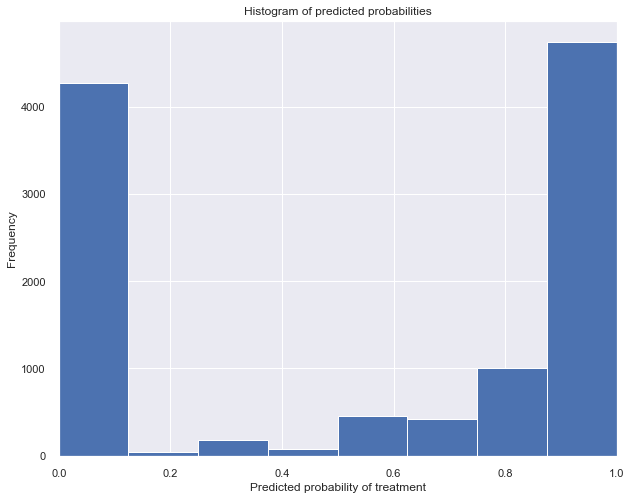

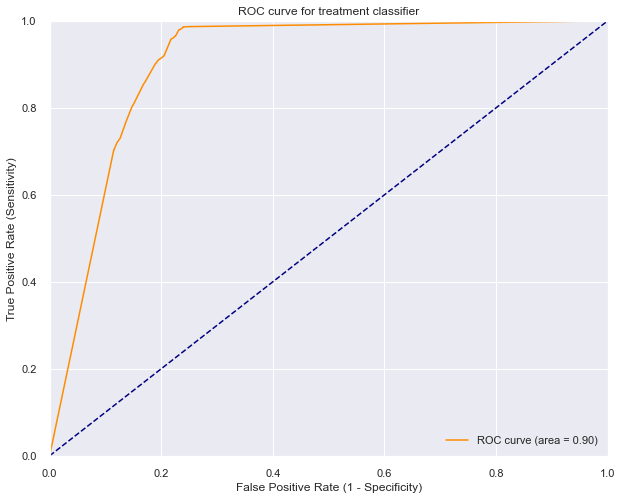

In [54]:
# retrain the model using the best set of parameters
# IMPORTANT: max_features = 'sqrt' means square root of the total feature number
clf_tuned = DecisionTreeClassifier(random_state = 5, max_depth= 35,max_features='sqrt',
                                   min_samples_leaf=2, min_samples_split=4)
clf_tuned.fit(X_train, y_train)
clf_tuned_pred = clf_tuned.predict(X_test)
print('########### DecisionTreeClassifier ###############')
evalClassModel(clf_tuned, y_test, clf_tuned_pred, True)

## Part II: Random Forest Classifier

In [57]:
# create function to tune the model
def gridsearchcv_rf(model):
    params = {
        'n_estimators' : [n for n in range(300, 501, 70)],
        'max_depth' : [n for n in range(20, 36, 5)],
        'min_samples_split' : [n for n in range(8, 2, -2)],
        'min_samples_leaf' : [n for n in range(4, 1, -2)],
        }

    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, scoring = 'accuracy', n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

In [160]:
rf = RandomForestClassifier(max_features = 'sqrt', random_state = 5)
gridsearchcv_rf(rf)

########### RandomForestClassifier ###############
Accuracy: 0.954041487839771 

Null accuracy:
 1    5652
0    5532
Name: ANXEV_A, dtype: int64
Percentage of class = 1: 0.5053648068669528
Percentage of class = 0: 0.49463519313304716
True: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0]
Pred: [0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0      0.971     0.935     0.953      5532
           1      0.938     0.973     0.955      5652

    accuracy                          0.954     11184
   macro avg      0.955     0.954     0.954     11184
weighted avg      0.955     0.954     0.954     11184



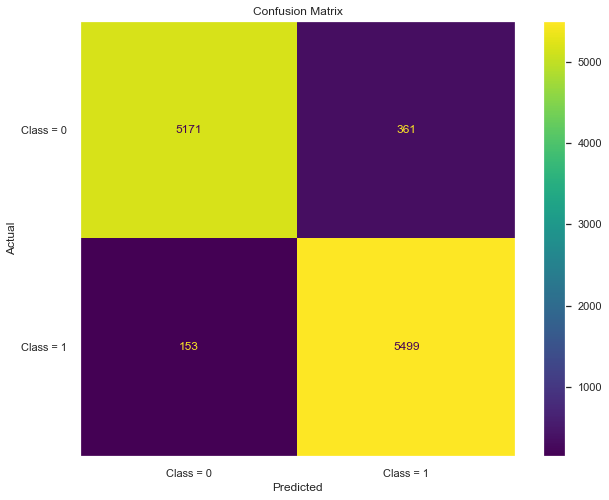

Classification Accuracy: 0.95404 

Classification Error: 0.04596 

False Positive Rate: 0.06526 

Precision: 0.9384 

AUC Score: 0.95384 

Cross-validated AUC: 0.98833 

First 10 predicted responses:
 [0 1 0 0 1 1 1 1 0 1]
First 10 predicted probabilities of class members:
 [[0.89732795 0.10267205]
 [0.04153093 0.95846907]
 [0.86331477 0.13668523]
 [0.96433099 0.03566901]
 [0.07207943 0.92792057]
 [0.11371503 0.88628497]
 [0.01191466 0.98808534]
 [0.1967238  0.8032762 ]
 [0.66469911 0.33530089]
 [0.38150697 0.61849303]]


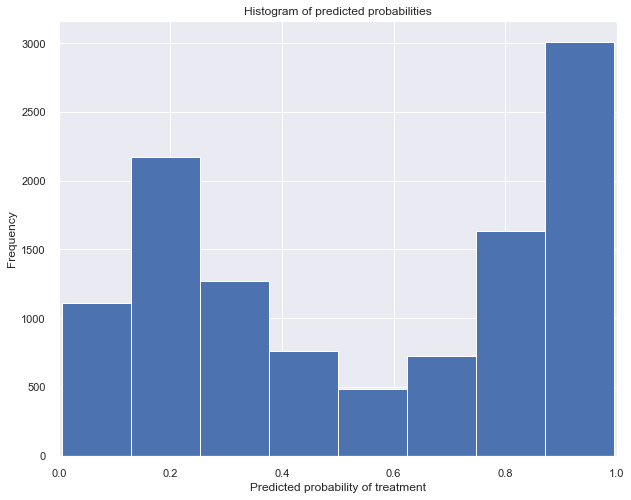

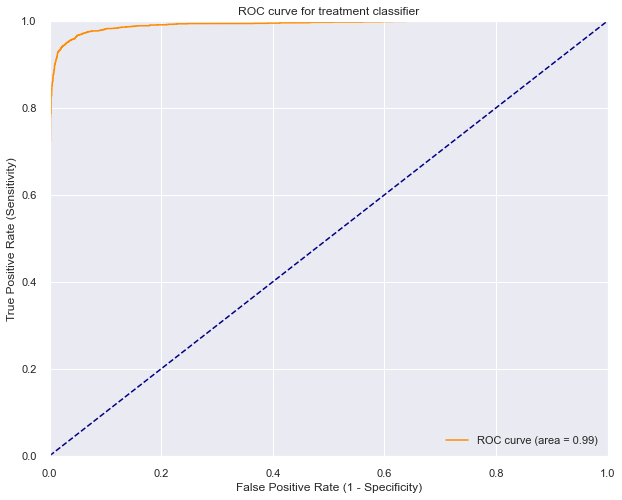

In [59]:
rf_tuned = RandomForestClassifier(max_depth = 25, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 370, max_features = 'sqrt', random_state = 5)
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)
print('########### RandomForestClassifier ###############')
evalClassModel(rf_tuned, y_test, rf_tuned_pred, True)

Random Forest Classifier turns out to have the highest accuracy score, and the highest AUC score.
- Accuracy: 0.95318
- AUC Score: 0.99

It is unsurprising to see that RFC performs particularly well in training a large and high-dimensional dataset.

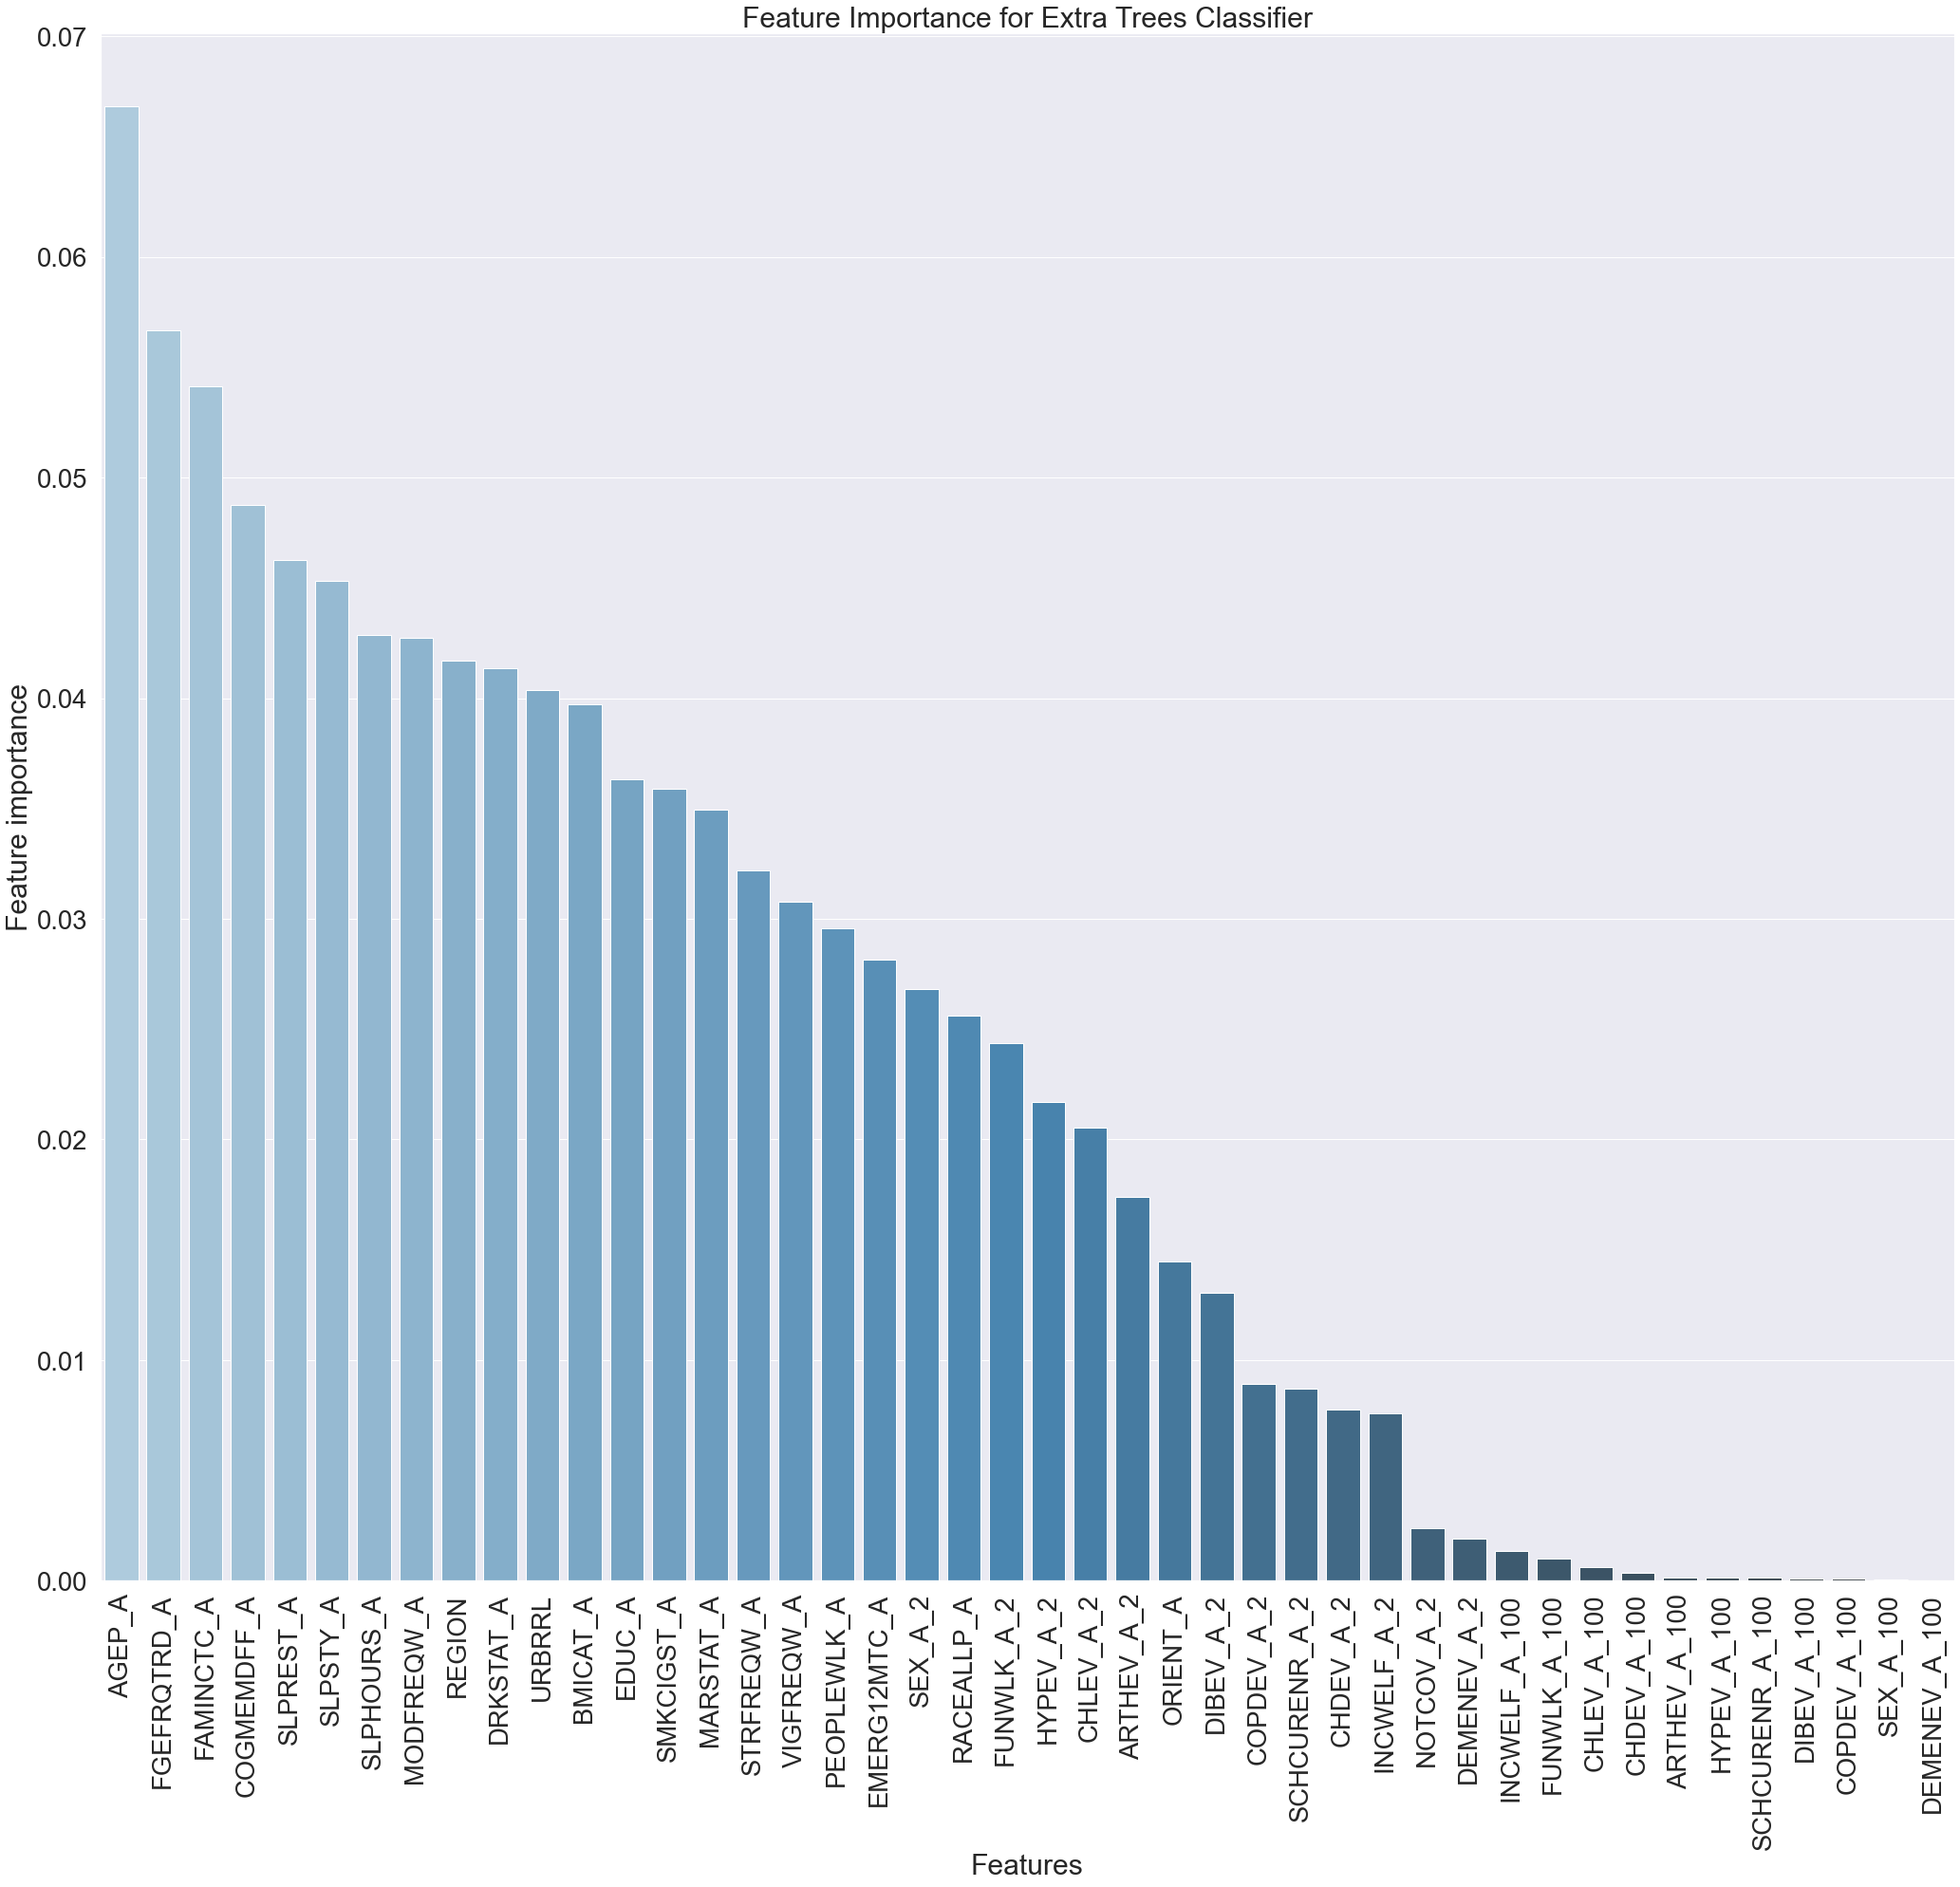

In [60]:
# plot the feature importances
importances_rf = rf_tuned.feature_importances_
forest_importances_rf = pd.DataFrame({'features': X_train.columns, 'importances': importances})

sns.set(rc = {'figure.figsize':(35,30)})
sns.set(font_scale = 2.5)
sns.barplot(x = "features", y = "importances" , data = forest_importances,
            order = forest_importances.sort_values('importances', ascending = False).features, palette = "Blues_d")
plt.xticks(rotation = 90)
plt.title("Feature Importance for Extra Trees Classifier")
plt.ylabel("Feature importance")
plt.xlabel("Features")
fig.tight_layout()

In [61]:
# display the significant features with a threshold
feature_important_rfc = forest_importances_rf[forest_importances_rf['importances'] >= importances_rf.mean()].sort_values(by = 'importances', 
                                                                           ascending = False).reset_index(drop = True)
feature_important_rfc

,features,importances
0,AGEP_A,0.066812
1,FGEFRQTRD_A,0.056676
2,FAMINCTC_A,0.054124
3,COGMEMDFF_A,0.048762
4,SLPREST_A,0.046248
5,SLPSTY_A,0.045317
6,SLPHOURS_A,0.042884
7,MODFREQW_A,0.042724
8,REGION,0.041683
9,DRKSTAT_A,0.041370


In [62]:
feature_important_rfc['features'].tolist()

['AGEP_A',
 'FGEFRQTRD_A',
 'FAMINCTC_A',
 'COGMEMDFF_A',
 'SLPREST_A',
 'SLPSTY_A',
 'SLPHOURS_A',
 'MODFREQW_A',
 'REGION',
 'DRKSTAT_A',
 'URBRRL',
 'BMICAT_A',
 'EDUC_A',
 'SMKCIGST_A',
 'MARSTAT_A',
 'STRFREQW_A',
 'VIGFREQW_A',
 'PEOPLEWLK_A',
 'EMERG12MTC_A',
 'SEX_A_2',
 'RACEALLP_A',
 'FUNWLK_A_2']

In [63]:
# print out the features
rf_list = ['AGEP_A','FAMINCTC_A','FGEFRQTRD_A','COGMEMDFF_A','MODFREQW_A','SLPREST_A','SLPHOURS_A','DRKSTAT_A','SLPSTY_A','EDUC_A',
           'REGION','STRFREQW_A','URBRRL','VIGFREQW_A','MARSTAT_A','BMICAT_A','SMKCIGST_A','RACEALLP_A','SEX_A','PEOPLEWLK_A']
descrip = []
for i in range(len(rf_list)):
    descrip.append(rv_['Description'].loc[rv_['Variable Names'] == rf_list[i]].tolist()[0])

pd.set_option('max_colwidth', 400)
fs_rf = pd.DataFrame({'Variable':rf_list, 'Description':descrip})

# display the table
fs_rf

,Variable,Description
0,AGEP_A,Age of SA
1,FAMINCTC_A,Sample adult family income
2,FGEFRQTRD_A,"How often tired, past 3m"
3,COGMEMDFF_A,Do you have difficulty remembering or concentrating?
4,MODFREQW_A,Frequency of moderate physical activity
5,SLPREST_A,"Wake up well rested, past 30 days"
6,SLPHOURS_A,Hours of sleep in a 24-hour period
7,DRKSTAT_A,Alcohol drinking status
8,SLPSTY_A,"Trouble staying asleep, past 30 days"
9,EDUC_A,Educational level of sample adult


These features are important in predict the diagnosis of anxiety disorder.

In [161]:
sns.reset_orig

<function seaborn.rcmod.reset_orig()>

----

## Question 2 

Which individual level characteristics are important in predicting the occurence of depression among people?

### Model Training

The target variable for this question is DEPFREQ_A which records how often an individual feels depressed. This variable takes different values corresponding to 6 different classes as shown below.

#### 1 - Daily 
##### 2  - Weekly 
##### 3  - Monthly 
##### 4 -  A few times a year 
##### 5 -  Never
##### 100  - Non-Response


In [162]:
# Printing each value of the target variable as a percentage of its total observations

(df['DEPFREQ_A'].value_counts()/len(df['DEPFREQ_A']))*100


5      56.418456
4      27.939698
3       6.806761
2       5.344906
1       3.120146
100     0.370032
Name: DEPFREQ_A, dtype: float64

The above distribution shows that our data is quite unbalanced as most of our target variable's observation belong to the classes '5' ad '4'.

In addition, we see that the class '100' is a very small percentage (0.37%) of the total observations. Since this observations are not relevant for our analysis we drop them from our data set before fitting various models.

In [163]:
df_1 = df[df['DEPFREQ_A'] != 100] #drop '100' values representing non-responses


#### Splitting data into training and test data 

In [164]:
# Defining X and y variables 

# All variables apart from the identified target variable are included as predictors in the model

X = np.array(df_1.drop('DEPFREQ_A', axis=1)) 

y = np.array(df_1['DEPFREQ_A']) # Variable that indicates how often respondents feel depressed

# Dividing data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

pd.DataFrame(y)

,0
0,5
1,5
2,1
3,3
4,5
...,...
21804,4
21805,2
21806,4
21807,5


#### Data Standardization

Since our models contain several predictors which vary widely in units and scale, we standardize these variables by rescaling them so that their mean is 0 and standard deviation is 1. 

In [165]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Oversampling

Since our data is highly imbalanced we use an oversampling procedure called the Synthetic Minority Oversampling Technique (SMOTE) which augments the data for the minority class by synthesizing new examples from the minority class. We use the imblearn package for this task.

In [166]:
over = SMOTE()

X_train, y_train = over.fit_resample(X_train, y_train)
X_test, y_test = over.fit_resample(X_test, y_test)

pd.DataFrame(y_test).value_counts() # artificially balanced data

1    2513
2    2513
3    2513
4    2513
5    2513
dtype: int64

#### Model 1 : KNN Classifier

The first model we fit is the k nearest neighbours (KNN) classifier. We begin by estimating a model with the default parameter value of 5 for the number of neighbours (k). Here we use all predictors in our data set. In this initial step we would like to see if the set of predictors that we have can be used to predict the occurence of depression.

We first fit a KNN model because it is a non-parametric approach and does not require any assumptions about the underlying distributions of the predictors.

CV accuracy score for k = 5 is 0.677180
              precision    recall  f1-score   support

           1       0.31      0.30      0.31      2513
           2       0.23      0.23      0.23      2513
           3       0.22      0.20      0.21      2513
           4       0.23      0.26      0.24      2513
           5       0.33      0.33      0.33      2513

    accuracy                           0.26     12565
   macro avg       0.26      0.26      0.26     12565
weighted avg       0.26      0.26      0.26     12565



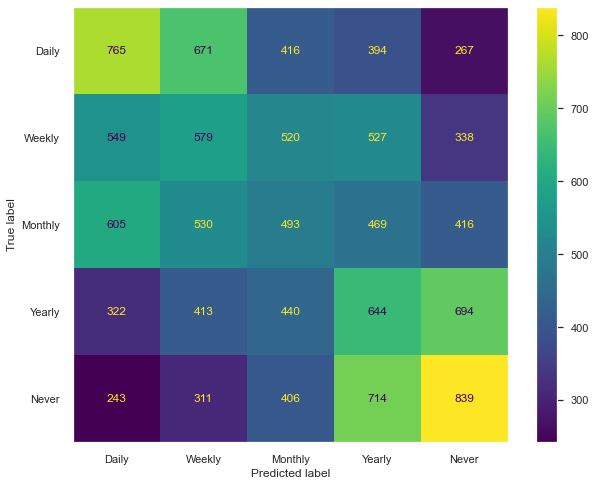

Accuracy score: 0.26422602467170714
Precision score: 0.26375218126014177


In [167]:
Neigh_train= KNeighborsClassifier() # Creating the classifier object
Neigh_train.fit(X_train, y_train)  #Training the model

#Taking the average of the accuracies over 10 folds to get the CV score/overall accuracy for default number of neighbours (5)
CV_score_k5 = np.mean(cross_val_score(Neigh_train, X_train, y_train, cv=10)) 
print("CV accuracy score for k = 5 is {:4f}".format(CV_score_k5))

# Using test data to validate our model

y_pred = Neigh_train.predict(X_test) # Predicting using test data
cm = confusion_matrix(y_test, y_pred) # Creating the confusion matrix
print(classification_report(y_test, y_pred))

#Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"])  
# Note: 'Yearly' refers to the class 'few times in a year'.

disp.plot()
sns.set(font_scale = 1)
plt.grid(False)
plt.show()

#Printing the overall accuracy score and precision score
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Precision score: {}".format(precision_score(y_test, y_pred, average='macro')))



The confusion matrix shows that our estimated classifier has difficulty classifying all classes but performs particularly worse for classes 'Daily'and 'Weekly' as compared to classes "Yearly" and "Never".

While CV accuracy score is above 0.5, the test accuracy and precision score are quite low indicating that our model doesn't perform very well on unseen data.

This could be because we haven't tuned our KNN classifier i.e. we still do not know if k = 5 is the optimal number of neighbours (k) that will perform the best on the test data. 

Therefore, we estimate knn models for a range of k's (1 to 100), get the cross validation accuracy (an estimate of the test accuracy) for each and choose the k that corresponds to the highest CV accuracy score in the next step.

##### Tuning KNN model 

In [77]:
CV_scores = []
Neighbours = []

# Creating a loop to estimate KNN classifier for number of neighbours ranging from 1 to 100
for i in range(1, 21):    
    Neigh_cv = KNeighborsClassifier(n_neighbors = i)   
    #Taking the average of the accuracies over 10 folds to get the CV score/overall accuracy for number of neighbours i
    CV_score = np.mean(cross_val_score(Neigh_cv, X_train, y_train, cv=10)) 
    # Creating a list of CV scores and corresponding number of neighbours
    CV_scores.append(CV_score)
    Neighbours.append(i)

The optimal number of neighbours is 1


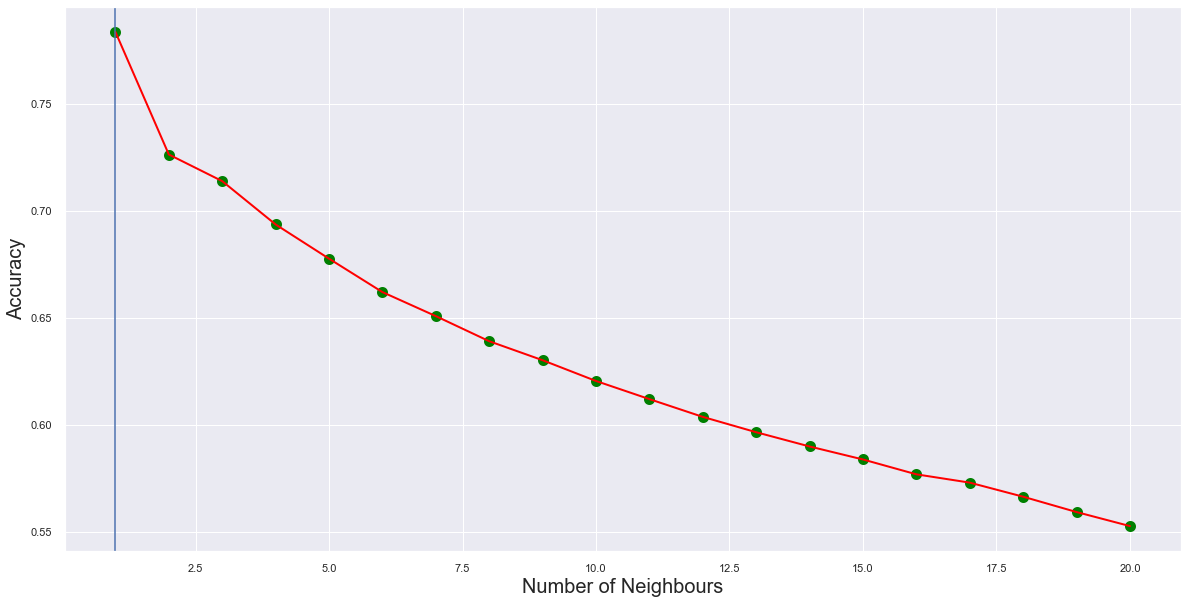

In [78]:
# Plotting the number of neighbours and accuracy
plt.figure(figsize=(20, 10)) 
plt.plot(Neighbours, CV_scores, color='red',linewidth=2)
plt.scatter(Neighbours, CV_scores, color='green',linewidth=5)
plt.xlabel("Number of Neighbours", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
best_k_Neigh_cv = np.array(Neighbours)[CV_scores == np.array(CV_scores).max()][0]
plt.axvline(x = int(best_k_Neigh_cv))

print("The optimal number of neighbours is {}".format(best_k_Neigh_cv))

As one can see from the vertical line in the graph, the optimal number of neighbours is 1 as this classifier gives maximum accuracy for this number.

#### Retraining the KNN model with optimal K

In [79]:
Neigh_train= KNeighborsClassifier(n_neighbors = 1) # Creating the classifier object with optimal number of neighbours
Neigh_train.fit(X_train, y_train)  #Training the model
min_CV_score_Neigh = np.mean(cross_val_score(Neigh_train, X_train, y_train, cv=10)) 

print("CV accuracy score for k = 1 is {:4f}".format(min_CV_score_Neigh))


CV accuracy score for k = 1 is 0.783798


              precision    recall  f1-score   support

           1       0.29      0.21      0.25      2513
           2       0.26      0.20      0.23      2513
           3       0.24      0.18      0.21      2513
           4       0.24      0.27      0.26      2513
           5       0.32      0.51      0.39      2513

    accuracy                           0.28     12565
   macro avg       0.27      0.28      0.26     12565
weighted avg       0.27      0.28      0.26     12565



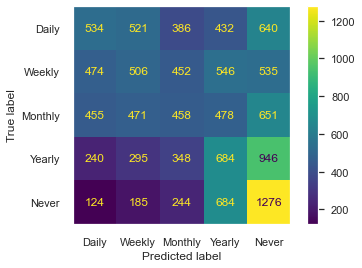

Accuracy score: 0.27520891364902506
Precision score: 0.26962163049938837


In [81]:
##### Using test data to validate our model

y_pred = Neigh_train.predict(X_test) # Predicting using test data
cm = confusion_matrix(y_test, y_pred) # Creating the confusion matrix
print(classification_report(y_test, y_pred))

#Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"])  
# Note: 'Yearly' refers to the class 'few times in a year'.

disp.plot()

plt.grid(False)
plt.show()

#Printing the overall accuracy score and precision score
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Precision score: {}".format(precision_score(y_test, y_pred, average='macro')))

accuracy_score_knn = accuracy_score(y_test, y_pred)
precision_score_knn = precision_score(y_test, y_pred, average='macro', zero_division = 0)

As we see above, CV accuracy score improves and so does the test accuracy and precision score. However, this model still does not seem to predict the frequency of depression well. This is probably because KNN does not perform very well when the dimensionality of the classification problem is high which is the case for our problem.

#### Model 2 : Naive Bayes Classifier

The second model we fit is the Naive Bayes (NB) classifier. Here we use all predictors which we had used in model 1. 
We fit the NB model because it is a reliable and simple approach that is not sensitive to irrelevant features in the model. However, the assumption that all predictors are independent and normally distributed for each class of depression frequency may not be entirely correct. The correlation matrix of the individual predictors plotted during data inspection revealed that many of these variables may be correlated implying that these may not be independent. 

However, an NB model estimates the Bayes Classifier and is a good reference to have. Therefore, we try to fit it in the next step.

CV accuracy score for NB is 0.256298
              precision    recall  f1-score   support

           1       0.42      0.31      0.36      2513
           2       0.00      0.00      0.00      2513
           3       0.21      0.79      0.33      2513
           4       0.12      0.01      0.03      2513
           5       0.21      0.08      0.11      2513

    accuracy                           0.24     12565
   macro avg       0.19      0.24      0.16     12565
weighted avg       0.19      0.24      0.16     12565



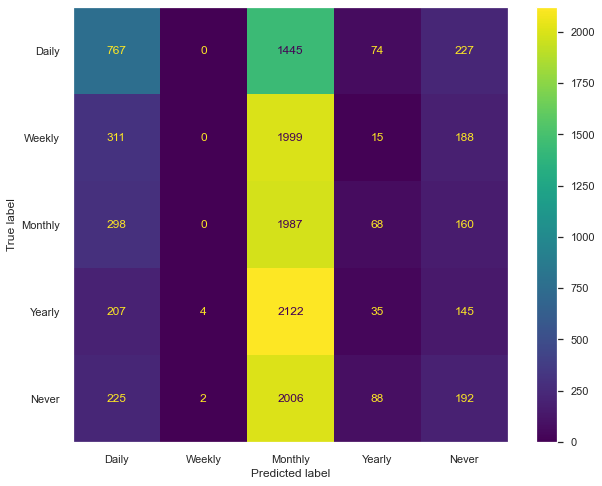

Accuracy score: 0.237246
Precision score: 0.193524


In [172]:
gnb = GaussianNB() # Creating the classifier object
gnb.fit(X_train, y_train)

CV_score_NB = np.mean(cross_val_score(gnb, X_train, y_train, cv=10)) 

print("CV accuracy score for NB is {:4f}".format(CV_score_NB))


y_pred = gnb.predict(X_test) # Predicting using training data just to get an idea of fit on training data


print(classification_report(y_test, y_pred, zero_division = 0))

cm = confusion_matrix(y_test, y_pred, normalize = None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"]) 
disp.plot()

plt.grid(False)
plt.show()

#Printing the overall accuracy score and precision score 

print("Accuracy score: {:4f}".format(accuracy_score(y_test, y_pred)))

print("Precision score: {:4f}".format(precision_score(y_test, y_pred, average='macro', zero_division = 0)))

accuracy_score_nb = accuracy_score(y_test, y_pred)
precision_score_nb = precision_score(y_test, y_pred, average='macro', zero_division = 0)

NB model performs worse than the knn model in terms of accuracy and precision. However, an important point to note here is that this model is able to predict the class "Daily" much better than the KNN despite the fact that the original data does not have many observations in that class.

However, the models performance is limited probably due to the strong assumptions of conditionally independent predictors and predictors being normally distributed.

#### Model 3 : Logistic Regression

The next model we look at is a logistic regression model. We also introduce an L2 regularization in this model to prevent overfitting. The advantage of using a logistic regression is that this model will also help us see which predictors are actually important in predicting the occurence of depression. 

CV accuracy score for Logistic Regression is 0.286775


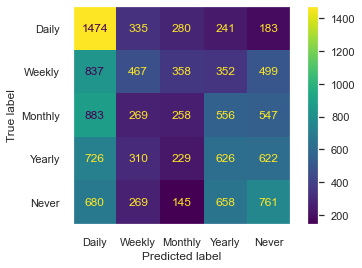

Accuracy score: 0.285396
Precision score: 0.271052


In [83]:
clf = LogisticRegression(penalty = 'l2', random_state=1, max_iter = 10000).fit(X_train, y_train)

CV_score_log = np.mean(cross_val_score(clf, X_train, y_train, cv=10)) 

#Printing the cross-validation accuracy score 

print("CV accuracy score for Logistic Regression is {:4f}".format(CV_score_log))

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"])
disp.plot()
plt.grid(False)
plt.show()

#Printing the overall accuracy score and precision score 

print("Accuracy score: {:4f}".format(accuracy_score(y_test, y_pred)))

print("Precision score: {:4f}".format(precision_score(y_test, y_pred, average='macro', zero_division = 0)))


accuracy_score_log = accuracy_score(y_test, y_pred)
precision_score_log = precision_score(y_test, y_pred, average='macro', zero_division = 0)

Although the accuracy and precision scores of this model are similar to those in the previous models (accuracy marginally better), we can look at the variables which were the most important in predicting the frequency of depression.

In [84]:
# Getting the variables with the highest weights in the logistic regression

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True) #create SelectFromModel object which will select features based on model importance

print("Features selected: "+str(list(df_1.drop('DEPFREQ_A', axis=1).columns[model.get_support()])))
#show the features that are most important based on the l2 penalty

features_selected = list(df_1.drop('DEPFREQ_A', axis=1).columns[model.get_support()])

print("\n")
for i in features_selected:
    if i in list(rv_['Variable Names']):
     print( i + ": " +list(rv_[rv_['Variable Names'] == i]['Description'])[0])

Features selected: ['AGEP_A', 'ANXFREQ_A', 'DRKSTAT_A', 'EDUC_A', 'MARSTAT_A', 'MODFREQW_A', 'RACEALLP_A', 'STRFREQW_A', 'VIGFREQW_A']


AGEP_A: Age of SA
ANXFREQ_A: How often feel worried, nervous, or anxious
DRKSTAT_A: Alcohol drinking status
EDUC_A: Educational level of sample adult
MARSTAT_A: Current Marital Status
MODFREQW_A: Frequency of moderate physical activity
RACEALLP_A: Single and multiple race groups
STRFREQW_A: Frequency of strengthening physical activity (times per week)
VIGFREQW_A: Frequency of vigorous physical activity


The most important features in the logistic regression after the L2 penalty imposed are shown above.
It is not surprising that variables which indicate prevalence of an anxiety disorder or its frequency, or those that record if an individual takes medication for depression or has ever had depression will be important in explaining how frequently a person gets depressed. However, it is interesting that individual characteristics such as alcohol consumption, educational level, phisical activity, ethnicity, sleep quality etc. are also important in explaining the frequency of depression.

Note: Age of SA refers to the age of sample respondent


#### Model 4 : Decision Tree

We next take a look at decision trees for our data. We first choose an arbitrary parameter value and then perform a grid search over possible parameter values to hypertune our decision tree.

CV accuracy score for Decision Tree with depth = 10 is 0.599880
              precision    recall  f1-score   support

           1       0.54      0.52      0.53      2513
           2       0.38      0.38      0.38      2513
           3       0.37      0.35      0.36      2513
           4       0.47      0.53      0.50      2513
           5       0.75      0.74      0.74      2513

    accuracy                           0.50     12565
   macro avg       0.50      0.50      0.50     12565
weighted avg       0.50      0.50      0.50     12565



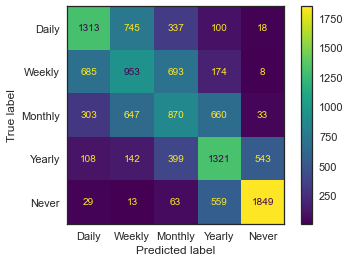

Accuracy score: 0.5018702745722244
Precision score: 0.502383


In [177]:
clf = DecisionTreeClassifier(max_depth = 10, random_state = 1)
clf.fit(X_train, y_train)

#Printing the cross-validation accuracy score 

CV_score_dt = np.mean(cross_val_score(clf, X_train, y_train, cv=10)) 

print("CV accuracy score for Decision Tree with depth = 10 is {:4f}".format(CV_score_dt))


y_pred = clf.predict(X_test) # Predicting using test data
cm = confusion_matrix(y_test, y_pred ) # Creating the confusion matrix
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize = None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"]) 
disp.plot()

plt.grid(False)
plt.show()



print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

print("Precision score: {:4f}".format(precision_score(y_test, y_pred, average='macro', zero_division = 0)))


accuracy_score_dt = accuracy_score(y_test, y_pred)
precision_score_dt = precision_score(y_test, y_pred, average='macro', zero_division = 0)


As we see above, both accuracy and precision improve when we use the decision tree classifier. 

In [179]:
viz = dtreeviz(clf, X_train, y_train,
               target_name= 'DEPFREQ_A' ,
               feature_names=df_1.drop('DEPFREQ_A', axis=1).columns.tolist(),
               title= 'Decision_tree',
               fontname="Arial",
               title_fontsize=14,
               colors = {"title":"darkblue"},
              scale=1)

viz

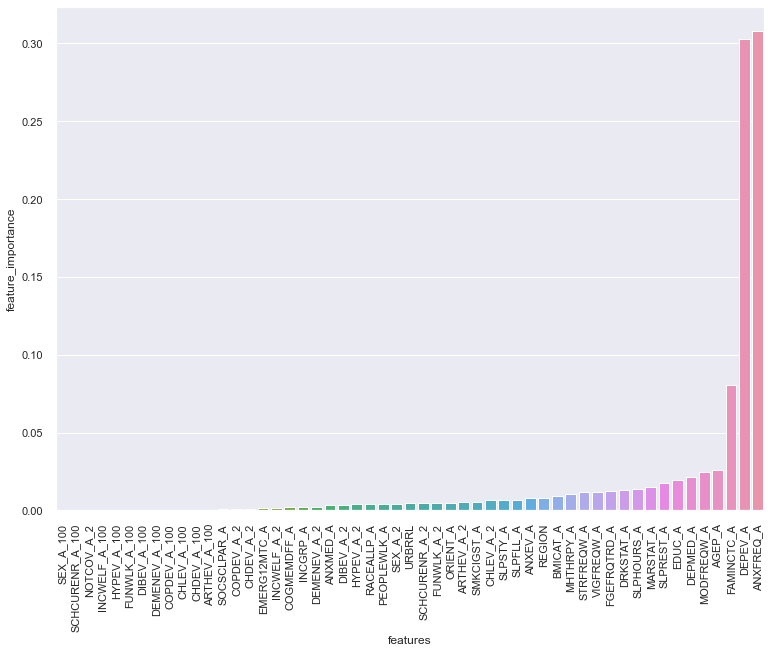

In [87]:

f = pd.DataFrame({'features' : list(df_1.drop('DEPFREQ_A', axis=1).columns), 'feature_importance' : list(clf.feature_importances_ )})
f = f.sort_values(by = 'feature_importance')

sns.set(rc={'figure.figsize':(12.7,9.27)})

barplot = sns.barplot(x='features', y = 'feature_importance', data = f)

ticks = barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 90)


In [88]:
#Printing top most important features
features_selected = f.sort_values(by = 'feature_importance', ascending = False)['features'].head(17)

print("Most important features: \n")

for i in features_selected:
    if i in list(rv_['Variable Names']):
     print( i + ": " +list(rv_[rv_['Variable Names'] == i]['Description'])[0])



Most important features: 

ANXFREQ_A: How often feel worried, nervous, or anxious
DEPEV_A: Ever had depression
FAMINCTC_A: Sample adult family income
AGEP_A: Age of SA
MODFREQW_A: Frequency of moderate physical activity
DEPMED_A: Take medication for depression
EDUC_A: Educational level of sample adult
SLPREST_A: Wake up well rested, past 30 days
MARSTAT_A: Current Marital Status
SLPHOURS_A: Hours of sleep in a 24-hour period
DRKSTAT_A: Alcohol drinking status
FGEFRQTRD_A: How often tired, past 3m
VIGFREQW_A: Frequency of vigorous physical activity
STRFREQW_A: Frequency of strengthening physical activity (times per week)
MHTHRPY_A: Received counseling/therapy from mental health professional, past 12m
BMICAT_A: Categorical body mass index, public use
REGION: Household region


Most of the important features listed above were also selected by the logistic regression.

In [89]:
clf = DecisionTreeClassifier(random_state = 1)
clf_hyptun = GridSearchCV(estimator = clf, param_grid={'max_depth': [10, 20, 30, 40, 50 ], 'min_samples_split' : [2, 4, 8, 10]}, n_jobs = -1, 
                          scoring= 'neg_mean_squared_error' )
clf_hyptun.fit(X_train, y_train)
print(clf_hyptun.best_params_)

{'max_depth': 30, 'min_samples_split': 2}


CV accuracy score for Decision Tree with depth = 40 is 0.741145
              precision    recall  f1-score   support

           1       0.51      0.42      0.46      2513
           2       0.35      0.34      0.34      2513
           3       0.33      0.32      0.32      2513
           4       0.39      0.46      0.42      2513
           5       0.65      0.68      0.66      2513

    accuracy                           0.44     12565
   macro avg       0.44      0.44      0.44     12565
weighted avg       0.44      0.44      0.44     12565



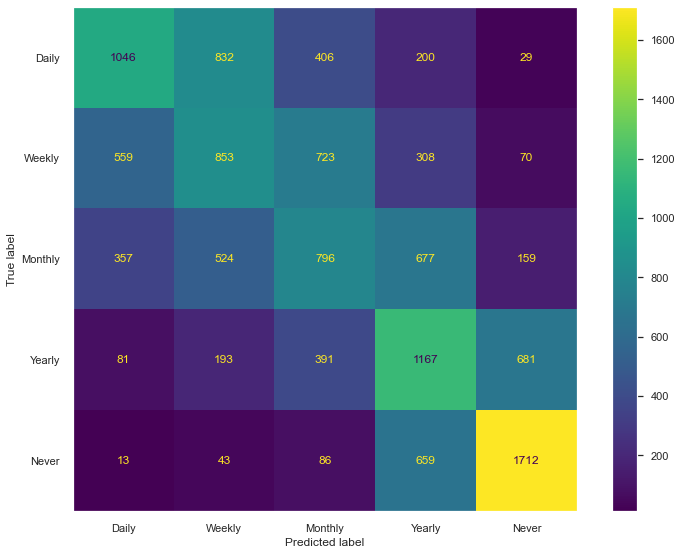

Accuracy score: 0.4436132113012336
Precision score: 0.444479


In [90]:
# Retraining decision tree

clf = DecisionTreeClassifier(max_depth = 40, min_samples_split = 2, random_state = 1 )
clf.fit(X_train, y_train)

CV_score_dt = np.mean(cross_val_score(clf, X_train, y_train, cv=10)) 

print("CV accuracy score for Decision Tree with depth = 40 is {:4f}".format(CV_score_dt))


y_pred = clf.predict(X_test) # Predicting using test data
cm = confusion_matrix(y_test, y_pred ) # Creating the confusion matrix
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred, normalize = None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"]) 
disp.plot()

plt.grid(False)
plt.show()


print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision score: {:4f}".format(precision_score(y_test, y_pred, average='macro', zero_division = 0)))


The retrained model with depth 40 doesn't improve the test accuracy or precision. In fact, both fall slightly. This could be due to overfitting in the model with max_depth = 40.

Therefore, we select the first model with max_depth = 10.

#### Model 5 : Random Forest Classifier

In [91]:
rfr = RandomForestClassifier(random_state = 1)
regr_hyptun = GridSearchCV(estimator = rfr, param_grid={'max_depth': [20, 30, 40 ], 'min_samples_split' : [2, 5, 8], 'n_estimators': [100, 200, 500, 800]}, n_jobs = -1)
regr_hyptun.fit(X_train, y_train)
print(regr_hyptun.best_params_)


{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 800}


In [92]:
# Using results from the grid search
clf = RandomForestClassifier(random_state = 1, n_estimators = 800, max_depth = 30, min_samples_split = 2, n_jobs = -1)

clf.fit(X_train, y_train)

CV_score_rf = np.mean(cross_val_score(clf, X_train, y_train, cv=10)) 

print("CV accuracy score for Random Forest Classifier is {:4f}".format(CV_score_rf))


CV accuracy score for Random Forest Classifier is 0.867342


              precision    recall  f1-score   support

           1       0.64      0.45      0.53      2513
           2       0.40      0.42      0.41      2513
           3       0.42      0.38      0.40      2513
           4       0.48      0.63      0.55      2513
           5       0.76      0.79      0.77      2513

    accuracy                           0.53     12565
   macro avg       0.54      0.53      0.53     12565
weighted avg       0.54      0.53      0.53     12565



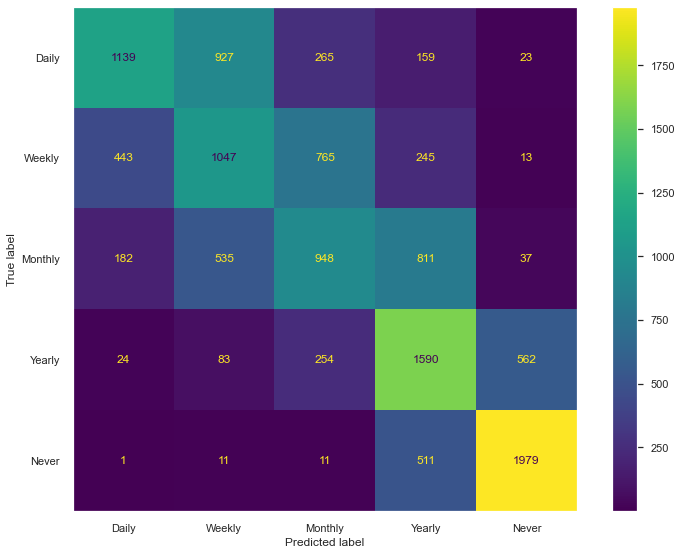

Accuracy score: 0.533465976920016
Precision score: 0.539623


In [93]:
y_pred = clf.predict(X_test) # Predicting using test data

print(classification_report(y_test, y_pred,zero_division = 0))

cm = confusion_matrix(y_test, y_pred, normalize = None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"]) 
disp.plot()

plt.grid(False)
plt.show()


print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision score: {:4f}".format(precision_score(y_test, y_pred, average='macro', zero_division = 0)))


accuracy_score_rf = accuracy_score(y_test, y_pred)
precision_score_rf = precision_score(y_test, y_pred, average='macro', zero_division = 0)


The Random Forest Model improves the accuracy and precision score relative to the decision tree. This is expected given that a number of decision trees from different bootstrapped training samples are averaged. Random Forest Classifiers have an additional advantage because they tend to decorrelate trees by forcing each split to consider only a subset of the predictors and thereby make our results more reliable. They are particularly useful for high dimensional data where variables are extremely correlated.

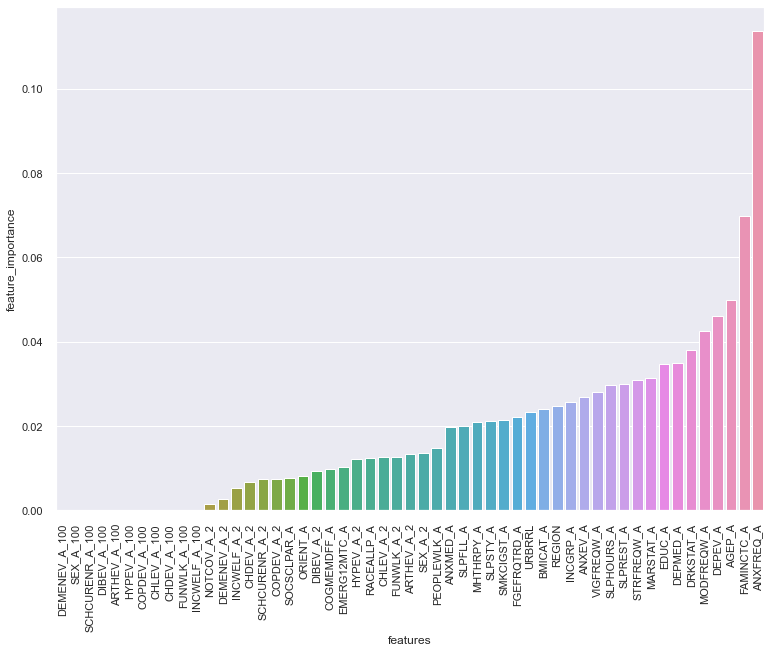

In [94]:
# Plotting important features

f = pd.DataFrame({'features' : list(df_1.drop('DEPFREQ_A', axis=1).columns), 'feature_importance' : list(clf.feature_importances_ )})
f = f.sort_values(by = 'feature_importance')

sns.set(rc={'figure.figsize':(12.7,9.27)})

barplot = sns.barplot(x='features', y = 'feature_importance', data = f)

ticks = barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 90)


In [95]:
#Printing top most important features
features_selected = f.sort_values(by = 'feature_importance', ascending = False)['features'].head(17)

print("Most important features: \n")

for i in features_selected:
    if i in list(rv_['Variable Names']):
     print( i + ": " +list(rv_[rv_['Variable Names'] == i]['Description'])[0])


Most important features: 

ANXFREQ_A: How often feel worried, nervous, or anxious
FAMINCTC_A: Sample adult family income
AGEP_A: Age of SA
DEPEV_A: Ever had depression
MODFREQW_A: Frequency of moderate physical activity
DRKSTAT_A: Alcohol drinking status
DEPMED_A: Take medication for depression
EDUC_A: Educational level of sample adult
MARSTAT_A: Current Marital Status
STRFREQW_A: Frequency of strengthening physical activity (times per week)
SLPREST_A: Wake up well rested, past 30 days
SLPHOURS_A: Hours of sleep in a 24-hour period
VIGFREQW_A: Frequency of vigorous physical activity
ANXEV_A: Any type of anxiety disorder?
INCGRP_A: Sample adult family income (grouped)
REGION: Household region
BMICAT_A: Categorical body mass index, public use


Here we see that most of the variables which turned out to be important predictors in the logistic regression and decision tree model are also important predictors in the random forest model. Interestingly, family and individual income also get added to the set of features and race is no longer a part of this set.

Thus, we see that factors such as alcohol consumption, quality of sleep, physical activity and exercise, marital status, education level and age are all important predictors of depression frequency across all models.


----

### Model Comparison

In [180]:
model_comp = pd.DataFrame({'Model':["KNN Model", "Naive Bayes Classifier", "Logistic Regression Model", "Decision Tree", "Random Forest Classifier"],
                         'Accuracy on Test Data':[accuracy_score_knn, accuracy_score_nb, accuracy_score_log, accuracy_score_dt, accuracy_score_rf],
                         'Precision on Test Data':[precision_score_knn, precision_score_nb, precision_score_log, precision_score_dt, precision_score_rf]})

model_comp

,Model,Accuracy on Test Data,Precision on Test Data
0,KNN Model,0.275209,0.269622
1,Naive Bayes Classifier,0.237246,0.193524
2,Logistic Regression Model,0.285396,0.271052
3,Decision Tree,0.501870,0.502383
4,Random Forest Classifier,0.533466,0.539623


Random Forest Classifier with tuned parameters from grid search is the best model

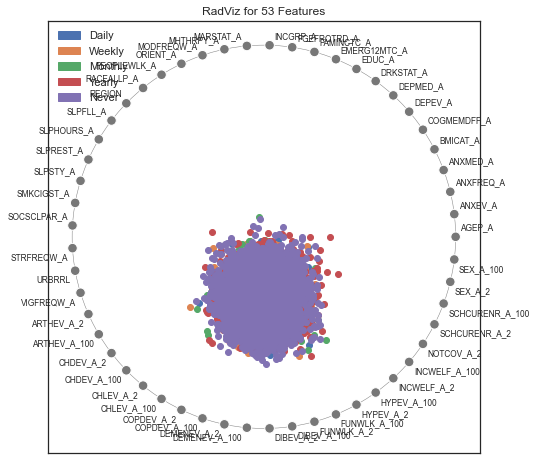

In [181]:
from yellowbrick.features import RadViz

fig = plt.figure( )
ax = fig.add_axes( [0.5, 0.5, 1, 1.5] )

# Instantiate the visualizer
visualizer = RadViz(features = df_1.drop('DEPFREQ_A', axis=1).columns, ax = ax, classes = ["Daily", "Weekly", "Monthly",
                                                                     "Yearly", "Never"])

visualizer.fit(X,y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

An important aspect of this section of the analysis is the consistently low precision and accuracy observed across all models. This is probably because of the fact that the various classes in the target variable aren't quite separable. This is confirmed by the radviz plot shown above. 
Perhaps having a larger sample size with more balanced data would help categorize depression frequency more accurately and precisely. 

# Question 3

***Question: What features are important in predicting whether an individual has sought mental health treatment?***

Target: MHTHRPY_A - whether the survey respondent has sought mental health treatment/services.
- 1: Sought mental health treatment/services.
- 2: Has not sought mental health treatment/services.

****Logistic Regression****

Below we set y as the target variable, MHTHRPY_A, which represents whether an individual sought mental health treatment. We choose to drop non-respondants which have a value of 100. We justify this decision based on the fact that there are not many 100s and our goal is not to classify who did not respond to the given survey question. The x variable is set as the remaining features in our dataset.

In [98]:
df_category = df_category[df_category['MHTHRPY_A'] != 100] #drop 100s aka non-respondents 

y = pd.DataFrame(df_category['MHTHRPY_A']) #set target to y
x = df_category.drop(['MHTHRPY_A'], axis=1) #set features to x
x = pd.DataFrame(x, columns=x.columns)
print(y)

       MHTHRPY_A
0              2
1              2
2              2
3              2
4              2
...          ...
21885          2
21886          2
21887          2
21888          2
21889          2

[21866 rows x 1 columns]


**Data Processing: Getting Dummies, Standardizing, Oversampling**

Using our rv_ reference table that indicates whether a variable is binary or ordinal, we convert those that are binary to dummy variables. We the standardize the features using StandardScaler

In [99]:
rv_1 = rv_[rv_['Variable Names'] != 'MHTHRPY_A'] #dropping target variable from reference table

In [100]:
#converting binary variables to dummy
x = pd.get_dummies(x, columns = rv_1['Variable Names'].loc[rv_1['Type**'] == 'Binary'], drop_first = True)
x = pd.DataFrame(x)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() #creating StandardScaler object
x_trans = scaler.fit_transform(x) #transforming features
x = pd.DataFrame(x_trans, columns = x.columns)
print(x)

         AGEP_A   ANXEV_A  ANXFREQ_A  ANXMED_A  BMICAT_A  COGMEMDFF_A  \
0      1.753107  0.017362   0.190709  0.023336 -0.212715     0.405720   
1     -1.254750  0.017362  -0.161297  0.023336 -0.212715    -0.110754   
2      0.901827  0.017362   0.014706  0.023336 -0.138799    -0.110754   
3     -1.254750  0.017362  -0.513304  0.023336 -0.064883    -0.110754   
4      1.299091  0.017362   0.190709  0.023336  7.031021    -0.110754   
...         ...       ...        ...       ...       ...          ...   
21861  0.107298  0.017362   0.014706  0.023336 -0.064883    -0.110754   
21862  0.334306  0.017362   0.014706  0.023336 -0.212715    -0.110754   
21863  0.050546  0.017362   0.014706  0.023336 -0.064883    -0.110754   
21864  0.674819  0.017362   0.014706  0.023336 -0.064883     0.405720   
21865 -0.970990  0.017362  -0.337300  0.023336 -0.064883     0.405720   

        DEPEV_A  DEPFREQ_A  DEPMED_A  DRKSTAT_A  ...  FUNWLK_A_100  HYPEV_A_2  \
0      0.009181   0.073369  0.000406   1.6

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, train_size=.7, random_state=0) #splitting data
print(y_test) #print y-test

       MHTHRPY_A
14909          2
11468          2
6088           2
19560          2
19114          2
...          ...
5548           2
18850          2
1540           2
3784           2
13480          2

[6560 rows x 1 columns]


In [105]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

over = SMOTE() #creating SMOTE object

x_train, y_train = over.fit_resample(x_train, y_train) #oversampling train and test datasets to balance data
x_test, y_test = over.fit_resample(x_test, y_test)

In [106]:
print(y_test)

       MHTHRPY_A
0              2
1              2
2              2
3              2
4              2
...          ...
11749          1
11750          1
11751          1
11752          1
11753          1

[11754 rows x 1 columns]


**Logistic Regression Model 1: Using All Features**

Below, we fit the logistic regression using all the features in our dataset. We see that the test accuracy of the model is relatively high at ~.802. We then plot a confusion matrix to get a better understanding of the model's performance.

In [108]:
reg1 = LogisticRegression(max_iter=10000).fit(x_train, np.ravel(y_train)) #fitting model
y_pred_train = reg1.predict(x_train) #predicting y with training data
y_pred_test = reg1.predict(x_test)  #predict y-test with x-test

print('Train CV Accuracy:', np.mean(cross_val_score(reg1, x_train, np.ravel(y_train), cv=10))) #getting CV accuracy
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred_test)) #get test accuracy

Train CV Accuracy: 0.80874348046279
Test Accuracy: 0.8100221201293176


              precision    recall  f1-score   support

           1      0.822     0.792     0.806      5877
           2      0.799     0.828     0.813      5877

    accuracy                          0.810     11754
   macro avg      0.810     0.810     0.810     11754
weighted avg      0.810     0.810     0.810     11754



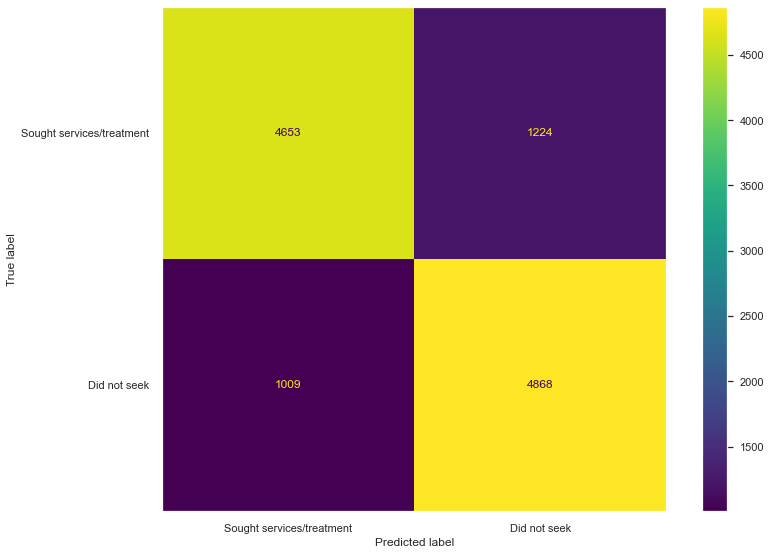

In [111]:
cm_log = confusion_matrix(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test, digits = 3))

display_cm_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Sought services/treatment',
                                                                                'Did not seek'])

display_cm_log.plot();
plt.grid(False)

The overall performance of the model is good. Both the precision and recall for both 1 and 2 hover around 0.8.

**Logistic Regression Model 2: Using Only Important Features**

By using the l2 penalty below, we are seeing which features are most important in the model. Using the most important features, we'll refit the model to see if its performance improves.

In [113]:
reg2 = LogisticRegression(penalty='l2', max_iter=10000).fit(x_train, np.ravel(y_train)) #fitting model
y_pred_train = reg2.predict(x_train) #predicting y with training data
y_pred_test = reg2.predict(x_test) 
model = SelectFromModel(reg2, prefit=True) #create SelectFromModel object which will select features based on model importance
x_new = model.transform(x_train.values) #transform x_train
x_new = pd.DataFrame(x_new)

feature_names= x_train.columns #get x_train column names
print("Features selected: "+str(feature_names[model.get_support()]))
#show the features that are most important based on the l2 penalty

Features selected: Index(['AGEP_A', 'ANXEV_A', 'ANXFREQ_A', 'ANXMED_A', 'COGMEMDFF_A', 'DEPEV_A',
       'DEPMED_A', 'DEMENEV_A_100'],
      dtype='object')


The most important features are the following:
- AGE_AP: Age
- ANXEV_A: Any type of anxiety disorder?
- ANXFREQ_A: How often feel worried, nervous, or anxious
- ANXMED_A: Take medication for worried/nervous/anxious feelings
- COGMEMDFF_A: Do you have difficulty remembering or concentrating?
- DEPEV_A: Ever had depression
- DEPMED_A: Take medication for depression
- DEMENEV_A: DEMENEV_A

Unsurprisingly, the most important features are those related to mental health. Below, we refit the model using these selected features to see if the model improves.

In [114]:
x_fs = x[['AGEP_A', 'ANXEV_A', 'ANXFREQ_A', 'ANXMED_A', 'COGMEMDFF_A', 'DEPEV_A',
       'DEPMED_A', 'DEMENEV_A_100']] #getting new x using important features 
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_fs, y, test_size=.3, train_size=.7, random_state=0) #splitting data
print(y_test2)

       MHTHRPY_A
14909          2
11468          2
6088           2
19560          2
19114          2
...          ...
5548           2
18850          2
1540           2
3784           2
13480          2

[6560 rows x 1 columns]


Train CV Accuracy: 0.9020639250692657
Test Accuracy: 0.9053353658536586
              precision    recall  f1-score   support

           1      0.657     0.190     0.295       683
           2      0.913     0.988     0.949      5877

    accuracy                          0.905      6560
   macro avg      0.785     0.589     0.622      6560
weighted avg      0.886     0.905     0.881      6560



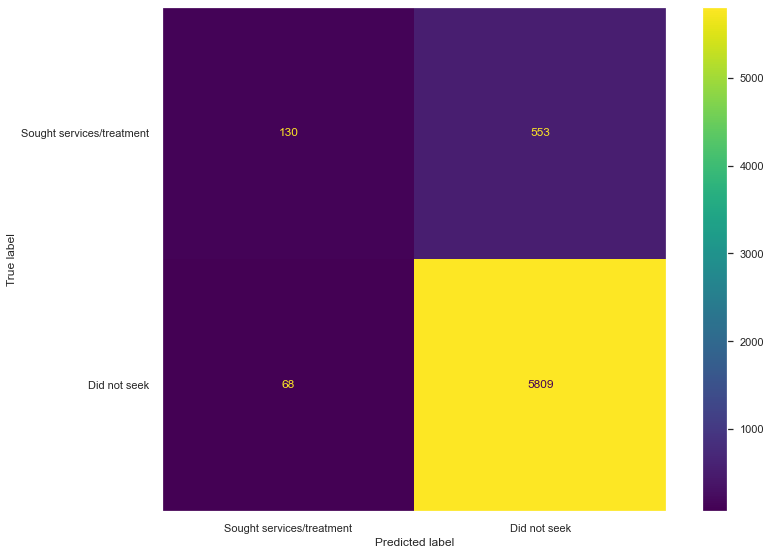

In [116]:
reg2 = LogisticRegression(max_iter=10000).fit(x_train2, np.ravel(y_train2)) #fitting model
y_pred_train = reg2.predict(x_train2) #predicting y with training data
y_pred_test = reg2.predict(x_test2) 

print('Train CV Accuracy:', np.mean(cross_val_score(reg2, x_train2, np.ravel(y_train2), cv=10))) #getting CV R-squared
print('Test Accuracy:', metrics.accuracy_score(y_test2, y_pred_test)) #test accuracy

cm_log = confusion_matrix(y_test2, y_pred_test) #create confusion matrix

print(classification_report(y_test2, y_pred_test, digits = 3))

display_cm_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Sought services/treatment',
                                                                                'Did not seek']) #plot confusion matrix

display_cm_log.plot()
plt.grid(False)

While the overall accuracy of the model improve, the precision and recall of 1 decreased significantly. This suggests that the overall accuracy may be a reflection of how well the model is classifying 2s. The high accuracy is not surprising given that the model was fitted using variables that are highly collinear to "MHTHRPY_A". To get a better understanding of what socioeconomic factors aside from mental health-related features can help predict whether one will seek mental health treatment, I will fit another logistic model omitting variables closely related to mental health.

***Logistic Model 3: Subset of Non-Mental Health Related Features***

Below, we subset the x by dropping variables related to mental health like frequency of anxiety and depression. Just like in the previous logistic regression, we get dummies, standardize the features, and oversample to balance the dataset.

In [117]:
x_uncorr = df_category.drop(['MHTHRPY_A','ANXEV_A', 'ANXFREQ_A', 'ANXMED_A', 'DEPEV_A', 'DEPFREQ_A', 'DEPMED_A'], axis=1)
list = ['ANXEV_A', 'ANXFREQ_A', 'ANXMED_A', 'DEPEV_A', 'DEPFREQ_A', 'DEPMED_A']

for var in list:
    rv_2 = rv_[rv_['Variable Names'] != var] #getting reference table without the mental-health related features

rv_2 = rv_[rv_['Variable Names'] != 'MHTHRPY_A']

#getting dummies for binary features in the resulting dataframe
x_uncorr = pd.get_dummies(x_uncorr, columns = rv_2['Variable Names'].loc[rv_2['Type**'] == 'Binary'], drop_first = True)
x = pd.DataFrame(x_uncorr)

#standardizing the features
scaler = StandardScaler()
x_trans = scaler.fit_transform(x_uncorr)
x = pd.DataFrame(x_trans, columns=x.columns)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=.3, train_size=.7, random_state=0) 
print(y_test3)

       MHTHRPY_A
14909          2
11468          2
6088           2
19560          2
19114          2
...          ...
5548           2
18850          2
1540           2
3784           2
13480          2

[6560 rows x 1 columns]


In [118]:
#oversampling to balance the dataset
x_train3, y_train3 = over.fit_resample(x_train3, y_train3)
x_test3, y_test3 = over.fit_resample(x_test3, y_test3)

In [119]:
reg3 = LogisticRegression(max_iter=10000).fit(x_train3, np.ravel(y_train3)) #fitting model
y_pred_train = reg3.predict(x_train3) #predicting y with training data
y_pred_test = reg3.predict(x_test3) 

print('Train CV Accuracy:', np.mean(cross_val_score(reg3, x_train3, np.ravel(y_train3), cv=10))) #getting CV R-squared
print('Test Accuracy:', metrics.accuracy_score(y_test3, y_pred_test)) #getting test accuracy

Train CV Accuracy: 0.6993283313211676
Test Accuracy: 0.7096307639952356


              precision    recall  f1-score   support

           1      0.702     0.729     0.715      5877
           2      0.718     0.690     0.704      5877

    accuracy                          0.710     11754
   macro avg      0.710     0.710     0.710     11754
weighted avg      0.710     0.710     0.710     11754



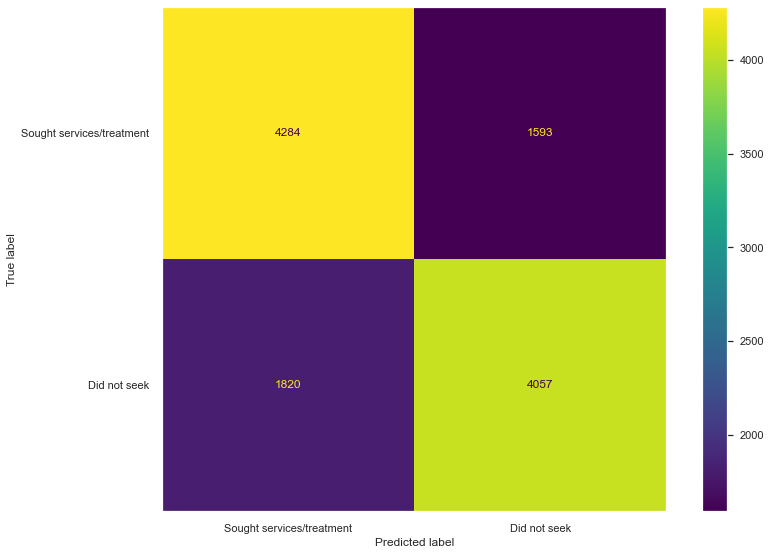

In [121]:
cm_log = confusion_matrix(y_test3, y_pred_test)

print(classification_report(y_test3, y_pred_test, digits = 3))

display_cm_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Sought services/treatment',
                                                                                'Did not seek'])

display_cm_log.plot()
plt.grid(False);

As expected, the overall accuracy of the model declined to an accuracy of around 0.7. However, the precision and recall of 1 and 2 are not skewed to one side and all hover around 0.7. This suggests that even without the highly correlated mental-health related features, there are some feature in our dataset that can predict whether one has sought mental health treatment. Below, we will take a look at what those features are through using the l2 penalty to feature select.

***Logistic Model 4: Important Features within Subset of Non-Mental Health Related Features***

In [123]:
reg4 = LogisticRegression(penalty='l2', max_iter=10000).fit(x_train3, np.ravel(y_train3)) #fitting model using l2 penalty
y_pred_train = reg4.predict(x_train3) #predicting y with training data
y_pred_test = reg4.predict(x_test3) 
model = SelectFromModel(reg4, prefit=True) #creating SelectFromModel object
x_new = model.transform(x_train3.values) #transforming features to contain only important features
x_new = pd.DataFrame(x_new)

feature_names= x_train3.columns
print("Features selected: "+str(feature_names[model.get_support()]))

Features selected: Index(['AGEP_A', 'COGMEMDFF_A', 'FGEFRQTRD_A', 'SLPFLL_A', 'SLPREST_A',
       'SLPSTY_A', 'SOCSCLPAR_A', 'DEMENEV_A_100', 'DIBEV_A_100', 'SEX_A_2'],
      dtype='object')


The most important features are the following:

- AGE_AP: Age
- COGMEMDFF_A: Do you have difficulty remembering or concentrating?
- EDUC_A: Educational level of sample adult
- FGEFRQTRD_A: How often tired, past 3m
- SLPFLL_A: Trouble falling asleep, past 30 days
- SLPREST_A: Wake up well rested, past 30 days
- SOCSCLPAR_A: Difficulty participating in social activities
- DEMENEV_A_100: Ever had dementia
- DIBEV_A_100: Ever had diabetes
- SEX_A_2: Sex

Below we refit the model using these important features to see if performance of the model improves.

In [124]:
x_fs = x[['AGEP_A', 'COGMEMDFF_A', 'FGEFRQTRD_A', 'SLPFLL_A', 'SLPREST_A',
       'SLPSTY_A', 'SOCSCLPAR_A', 'DEMENEV_A_100', 'DIBEV_A_100', 'SEX_A_2']]
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_fs, y, test_size=.3, train_size=.7, random_state=0) #splitting data         
print(y_test4)
         
x_train4, y_train4 = over.fit_resample(x_train4, y_train4)
x_test4, y_test4 = over.fit_resample(x_test4, y_test4)

       MHTHRPY_A
14909          2
11468          2
6088           2
19560          2
19114          2
...          ...
5548           2
18850          2
1540           2
3784           2
13480          2

[6560 rows x 1 columns]


Train CV Accuracy: 0.6683223230927562
Test Accuracy: 0.6721116215756339
              precision    recall  f1-score   support

           1      0.673     0.670     0.671      5877
           2      0.671     0.674     0.673      5877

    accuracy                          0.672     11754
   macro avg      0.672     0.672     0.672     11754
weighted avg      0.672     0.672     0.672     11754



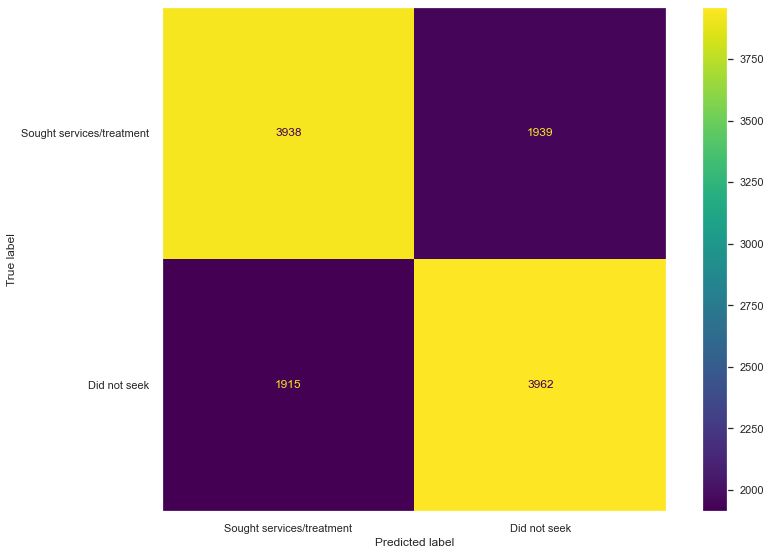

In [126]:
reg4 = LogisticRegression(max_iter=10000).fit(x_train4, np.ravel(y_train4)) #fitting model
y_pred_train = reg4.predict(x_train4) #predicting y with training data
y_pred_test = reg4.predict(x_test4) 

print('Train CV Accuracy:', np.mean(cross_val_score(reg4, x_train4, np.ravel(y_train4), cv=10))) #getting CV R-squared
print('Test Accuracy:', metrics.accuracy_score(y_test4, y_pred_test))

cm_log = confusion_matrix(y_test4, y_pred_test)

print(classification_report(y_test4, y_pred_test, digits = 3))

display_cm_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Sought services/treatment',
                                                                                'Did not seek'])

display_cm_log.plot()
plt.grid(False);

The model's decreased slightly when it was fitted using only using the features selected by using the l2 penalty.

# KNN Classification

In addition to logistic regression, we will test whether KNN is a effective classifier when it comes to predicting whether one has sought mental health treatment. First we process the dataset by getting dummies for binary variables, standardizing the data, oversampling, and splitting the data into test and train.

In [127]:
df_category = df_category[df_category['MHTHRPY_A'] != 100] #drop 100s aka non-respondents 

y = pd.DataFrame(df_category['MHTHRPY_A']) #set target to y
x = df_category.drop(['MHTHRPY_A'], axis=1) #set features to x
x = pd.DataFrame(x, columns=x.columns)
print(y)

       MHTHRPY_A
0              2
1              2
2              2
3              2
4              2
...          ...
21885          2
21886          2
21887          2
21888          2
21889          2

[21866 rows x 1 columns]


In [128]:
rv_3 = rv_[rv_['Variable Names'] != 'MHTHRPY_A'] #dropping target variable from reference table

In [129]:
#converting binary variables to dummy
x = pd.get_dummies(x, columns = rv_3['Variable Names'].loc[rv_3['Type**'] == 'Binary'], drop_first = True)
x = pd.DataFrame(x)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #create StandardScalar object
x_trans = scaler.fit_transform(x) #standardize features
x = pd.DataFrame(x_trans, columns = x.columns)
print(x)

         AGEP_A   ANXEV_A  ANXFREQ_A  ANXMED_A  BMICAT_A  COGMEMDFF_A  \
0      1.753107  0.017362   0.190709  0.023336 -0.212715     0.405720   
1     -1.254750  0.017362  -0.161297  0.023336 -0.212715    -0.110754   
2      0.901827  0.017362   0.014706  0.023336 -0.138799    -0.110754   
3     -1.254750  0.017362  -0.513304  0.023336 -0.064883    -0.110754   
4      1.299091  0.017362   0.190709  0.023336  7.031021    -0.110754   
...         ...       ...        ...       ...       ...          ...   
21861  0.107298  0.017362   0.014706  0.023336 -0.064883    -0.110754   
21862  0.334306  0.017362   0.014706  0.023336 -0.212715    -0.110754   
21863  0.050546  0.017362   0.014706  0.023336 -0.064883    -0.110754   
21864  0.674819  0.017362   0.014706  0.023336 -0.064883     0.405720   
21865 -0.970990  0.017362  -0.337300  0.023336 -0.064883     0.405720   

        DEPEV_A  DEPFREQ_A  DEPMED_A  DRKSTAT_A  ...  FUNWLK_A_100  HYPEV_A_2  \
0      0.009181   0.073369  0.000406   1.6

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, train_size=.7, random_state=0) #splitting data
print(y_test) #print y-test

       MHTHRPY_A
14909          2
11468          2
6088           2
19560          2
19114          2
...          ...
5548           2
18850          2
1540           2
3784           2
13480          2

[6560 rows x 1 columns]


In [131]:
over = SMOTE()

#oversample to address balance data
x_train, y_train = over.fit_resample(x_train, y_train)
x_test, y_test = over.fit_resample(x_test, y_test)

# of neighbors = 1
Accuracy:  0.925936697183848
# of neighbors = 2
Accuracy:  0.869220583776103
# of neighbors = 3
Accuracy:  0.8900007360606514
# of neighbors = 4
Accuracy:  0.8480389050724447
# of neighbors = 5
Accuracy:  0.8646193646356458
# of neighbors = 6
Accuracy:  0.8280258026594725
# of neighbors = 7
Accuracy:  0.8421227909179716
# of neighbors = 8
Accuracy:  0.813016205868697
# of neighbors = 9
Accuracy:  0.8259444311544606
# of neighbors = 10
Accuracy:  0.8007819310977892
# of neighbors = 11
Accuracy:  0.8135639310012479
# of neighbors = 12
Accuracy:  0.7928571447620618
# of neighbors = 13
Accuracy:  0.8058950990894983
# of neighbors = 14
Accuracy:  0.7870872559898936
# of neighbors = 15
Accuracy:  0.7994677828119704
# of neighbors = 16
Accuracy:  0.7810981891574532
# of neighbors = 17
Accuracy:  0.7929307641616336
# of neighbors = 18
Accuracy:  0.7765331596656897
# of neighbors = 19
Accuracy:  0.7879276319035355
# of neighbors = 20
Accuracy:  0.773502163244918
# of neighbor

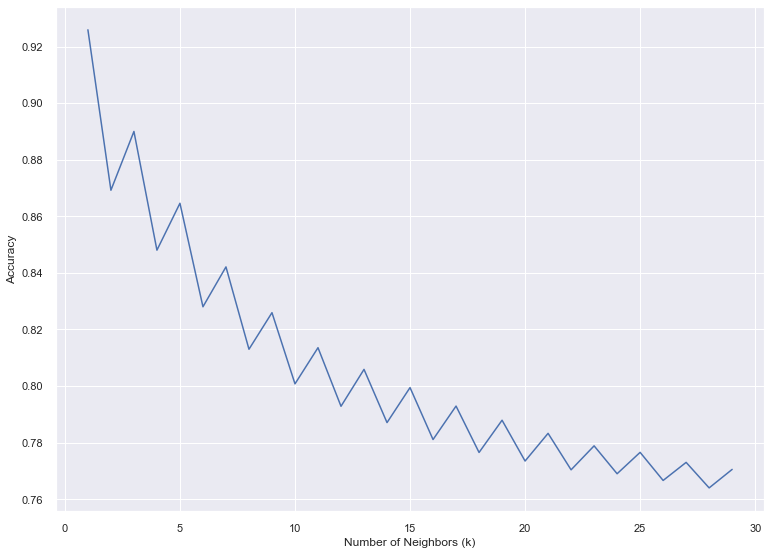

Optimal # of Neighbors: 1


In [132]:
from sklearn.neighbors import KNeighborsClassifier


knn_cv_error = [] #empty list to store KNN CV errors
for i in range(1, 30): #iterating through different # of neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_error = np.mean(cross_val_score(knn, x_train, np.ravel(y_train), cv=10)) #storing mean accuracy of each n
    knn_cv_error.append(cv_error) #appending average score to errors list
    print("# of neighbors =", i)
    print("Accuracy: ", cv_error)
   
    
k_range = range(1, 30) #creating range for x axis of plot
plt.plot(k_range,knn_cv_error) #plotting accuracy for each value of n from 1-29
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

print("Optimal # of Neighbors:", k_range[np.asarray(knn_cv_error).argmax()]) #printing optimal number of n

The optimal k=1, so we refit the model with k=1. We then plot a confusion matrix to see how well the model performed.

[[1781 4096]
 [ 816 5061]]
              precision    recall  f1-score   support

           1      0.686     0.303     0.420      5877
           2      0.553     0.861     0.673      5877

    accuracy                          0.582     11754
   macro avg      0.619     0.582     0.547     11754
weighted avg      0.619     0.582     0.547     11754



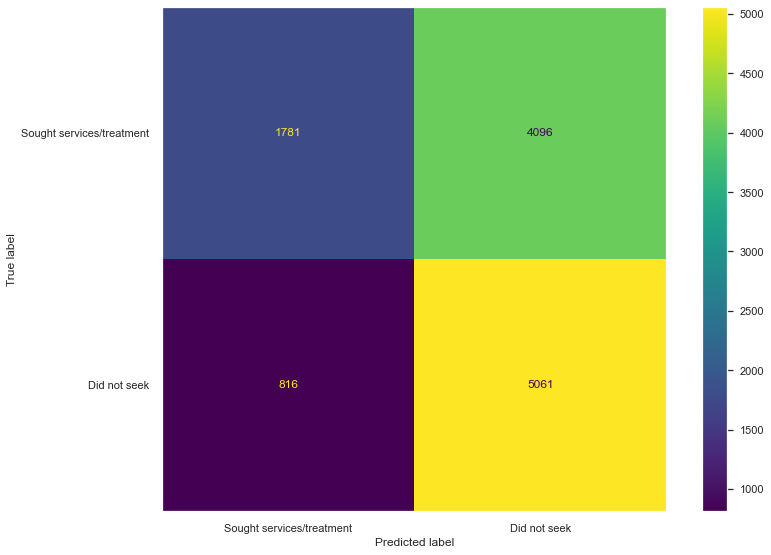

In [134]:
knn_cv = KNeighborsClassifier(n_neighbors=1) #creating KNN object with n=61
knn_cv.fit(x_train, np.ravel(y_train)) #fitting model to training dataset
y_pred = knn_cv.predict(x_test) #predicting test y using model
cm_happy_cv = confusion_matrix(y_test,y_pred) #creating confusion matrix
print(cm_happy_cv) #printing confusion matrix
print(classification_report(y_test, y_pred, digits=3)) #printing classification report

cm_happy_cv_plot = ConfusionMatrixDisplay(confusion_matrix=cm_happy_cv,display_labels=['Sought services/treatment',
                                                                                'Did not seek']) #creating confusion matrix heat map
cm_happy_cv_plot.plot()
plt.grid(False);

The optimal KNN model with n=1 resulted in an average classification model with an accuracy of .58. Notably, the precision of this model is better for predicting those who have sought mental health treatment/services. This is in contrast to the previous logistic regressions where the models were generally better at predicting whether an individual has not sought mental health treatment/services.

***Naive Bayes***

In [135]:
nb_hf = GaussianNB() #creating GaussianNB object
nb_pred = nb_hf.fit(x_train, np.ravel(y_train)).predict(x_test) #fit model and predict y using x_test
cm_hf = confusion_matrix(y_test,nb_pred) #creating confusion matric
print(classification_report(y_test, nb_pred, digits=3))

              precision    recall  f1-score   support

           1      0.502     0.971     0.662      5877
           2      0.561     0.037     0.069      5877

    accuracy                          0.504     11754
   macro avg      0.532     0.504     0.365     11754
weighted avg      0.532     0.504     0.365     11754



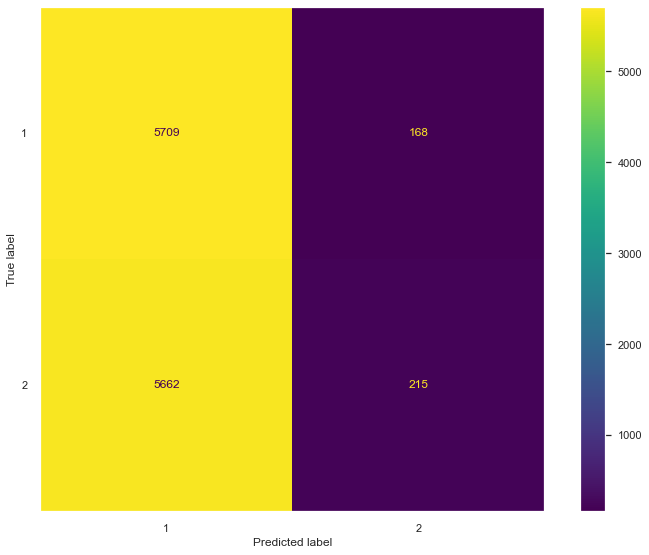

In [136]:
display_cm_hf = ConfusionMatrixDisplay(confusion_matrix=cm_hf,
                                        display_labels=['1','2']) #plot confusion matrix
display_cm_hf.plot()
plt.grid(False)

The Naive Bayes model did not perform well. This is unsurprising given that the Naive Bayes model assumes independence among predictors which is likely not the case within our dataset.

# ROC

Below, we graph the ROC curves of all models to select the best model for our given question.

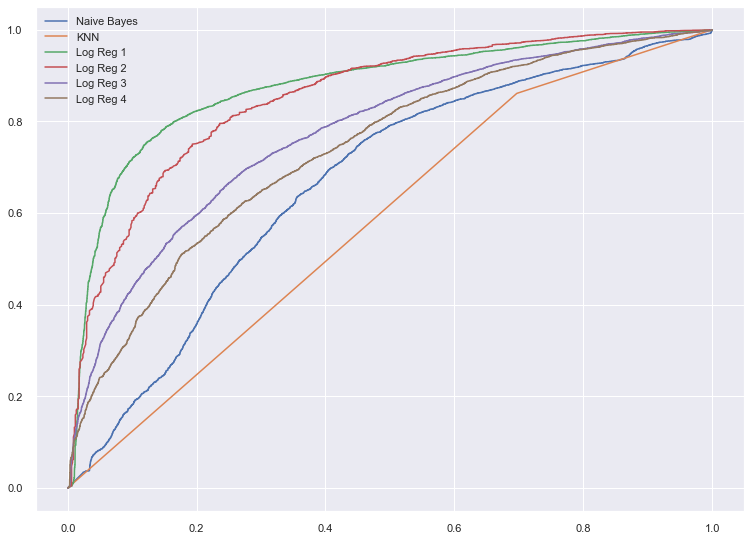

In [137]:
nb_probs = nb_hf.predict_proba(x_test) #obtain probabilities for 1 and 2 for each prediction
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_probs[:,1], pos_label=2) #get FPR and TPR according to each threshold

#do the same for knn and all logistic regressions below
knn_probs = knn_cv.predict_proba(x_test)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs[:,1], pos_label=2)

#log reg 1
log_probs_1 = reg1.predict_proba(x_test)
log_fpr,log_tpr,thresholds= roc_curve(y_test, log_probs_1[:,1], pos_label=2)

#log reg 2
log_probs_2 = reg2.predict_proba(x_test2)
log_fpr2, log_tpr2, thresholds2 = roc_curve(y_test2, log_probs_2[:,1], pos_label=2)

#log reg 3
log_probs_3 = reg3.predict_proba(x_test3)
log_fpr3,log_tpr3, thresholds3 =roc_curve(y_test3, log_probs_3[:,1], pos_label=2)

#log reg 4
log_probs_4 = reg4.predict_proba(x_test4)
log_fpr4, log_tpr4, thresholds4 = roc_curve(y_test4, log_probs_4[:,1], pos_label=2)

#plot all ROCs on same graph to compare
nb_plot = plt.plot(nb_fpr, nb_tpr, label = 'Naive Bayes')
knn_plot, = plt.plot(knn_fpr, knn_tpr, label = 'KNN')
log_plot1, = plt.plot(log_fpr, log_tpr, label = 'Log Reg 1')
log_plot2, = plt.plot(log_fpr2, log_tpr2, label = 'Log Reg 2')
log_plot3, = plt.plot(log_fpr3, log_tpr3, label = 'Log Reg 3')
log_plot4, = plt.plot(log_fpr4, log_tpr4, label = 'Log Reg 4')

plt.legend()

***Takeaways:***
- The first logistic regression using all features was the most effective model to predict whether an invidual has sought mental health treatment/services. This is unsurprising considering many variables related to other aspects of mental health were included in that model.
- Aside from variables related to mental health, the following variables are important in predicting our target:
    - AGE_AP: Age
    - COGMEMDFF_A: Do you have difficulty remembering or concentrating?
    - EDUC_A: Educational level of sample adult
    - FGEFRQTRD_A: How often tired, past 3m
    - SLPFLL_A: Trouble falling asleep, past 30 days
    - SLPREST_A: Wake up well rested, past 30 days
    - SOCSCLPAR_A: Difficulty participating in social activities
    - DEMENEV_A: Ever had dementia
    - DIBEV_A: Ever had diabetes
    - SEX_A: Sex
- In general, logistic regression seems to perform well for this particular question. Both KNN and Naive Bayes performed worse than all four logistic regression models.

----

##### Reflection on our analysis:
Conclusions:
- Unsurprisingly, mental health related features are important in predicting our target variables 
- However, we provide evidence that other features representing individual attributes like health conditions, lifestyle habits, sex, educational level, income etc. are also important in predicting the prevalence of a mental health condition/ the likelihood that an individual has sought mental health services.
- Policy implication: There are many socioeconomic predictors of mental health. Policymakers need to keep this in mind when designing interventions and public policies addressing the mental health crisis in the United States.

Limitations:
- Few sources: Data with mental health indicators is sensitive and may not always be accessible
- Small sample size: Increases margin of error and reduces the reliability of study
- Biased sample: Most observations lie in one or two categories of the outcome; observations in the class of interest are very small; introduces bias in  prediction
- High dimensional, categorical data: Encoded and used as ordinal variables in our study 
- High number of missing observations

Future Research:
- Time limitations:
More time would allow for finer tuning of models and the testing of more models
- Improvements to analysis:
1. Having a larger sample size 
2. More extensive grid search over parameters
3. Tune feature selection over thresholds for better classification
4. Similar analysis with continuous predictor variables
- Extensions to research
1. Unsupervised Learning : K-modes model
2. Time series analysis : Using data from various years
3. Conduct analysis on more diverse sample population
4. Use other features from survey data that were not included in our analysis
5. Similar analysis for a younger sample (youth surveys)


### Reference:
[1] Sctacked and Percent Stacked Barplot using Seaborn, https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

[2] sklearn.metrics.ConfusionMatrixDisplay, https://scikit-learn.org/0.23/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

[3] Creating multiple subplots using plt.subplots, https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

[4] Plotting with categorical data, https://seaborn.pydata.org/tutorial/categorical.html

[5] Multiple Subplots, https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

[6] Random Oversampling and Undersampling for Imbalanced Classification, https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

[7] SMOT Oversampling,https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

[8] Standard Scaler,https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[9] Logistic Regression Regularization, https://medium.com/@aditya97p/l1-and-l2-regularization-237438a9caa6

[10] An Introduction to Statistical Learning, with applications in R (Springer, 2013). G. James, D. Witten, T. Hastie and R.Tibshirani